_____
# 1. Problem Statement & Objective

OLA is a ride-hailing company that provides a platform for drivers to earn money by offering rides to passengers. The company has lately been facing a challenge in retaining its drivers. 

Attrition among drivers impacts the reputation of the organization due to service disruption and loss of revenue. And acquiring new drivers is more expensive than retaining existing ones.

The company wants to be able to predict the drivers who are most likely to leave the company in the following month and take targetted measures to retain them.

**Goal:** To build a binary classification model using ensemble learning that predicts the likelihood of a driver leaving the company. This model will serve as a decision-support tool for the OLA driver retention programme.

*   **Business Objective:** The primary goal is to minimize financial loss for OLA by accurately identifying drivers who are most likely to leave the company. This means minimizing the number of drivers who will ultimately quit. 

*   **ML Objective:** This is a binary classification problem with the target variable being `Churn`: 

    - `1` for *Likely to Quit the Company*

    - `0` for *Likely to Continue with the Company*

*   **Success Metrics:** Judging by the business objective, the following metrics may be prioritized:

    - **Recall:** capture as many actual quits as possible

    - **ROC AUC score:** to measure the model's ability to distinguish between positive and negative classes (separability)

    - **Precision:** to keep false positives to a minimum

    - **F1 Score:** to balance precision and recall

    - **Top 5 Features:** to understand the factors that contribute to driver attrition


_____
# 2. Data Loading and Initial Analysis

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

df = pd.read_csv("ola_drivers.csv")
display(df)

SrNo    MMM-YY  DriverID   Age  Gender City  EducationLevel  Income  \
0          0  01/01/19         1  28.0     0.0  C23               2   57387   
1          1  02/01/19         1  28.0     0.0  C23               2   57387   
2          2  03/01/19         1  28.0     0.0  C23               2   57387   
3          3  11/01/20         2  31.0     0.0   C7               2   67016   
4          4  12/01/20         2  31.0     0.0   C7               2   67016   
...      ...       ...       ...   ...     ...  ...             ...     ...   
19099  19099  08/01/20      2788  30.0     0.0  C27               2   70254   
19100  19100  09/01/20      2788  30.0     0.0  C27               2   70254   
19101  19101  10/01/20      2788  30.0     0.0  C27               2   70254   
19102  19102  11/01/20      2788  30.0     0.0  C27               2   70254   
19103  19103  12/01/20      2788  30.0     0.0  C27               2   70254   

      DateOfJoining LastWorkingDate  JoiningDesignation  Grade  \
0          24/12/18             NaN                   1      1   
1          24/12/18             NaN                   1      1   
2          24/12/18        03/11/19                   1      1   
3          11/06/20             NaN                   2      2   
4          11/06/20             NaN                   2      2   
...             ...             ...                 ...    ...   
19099      06/08/20             NaN                   2      2   
19100      06/08/20             NaN                   2      2   
19101      06/08/20             NaN                   2      2   
19102      06/08/20             NaN                   2      2   
19103      06/08/20             NaN                   2      2   

       TotalBusinessValue  QuarterlyRating  
0                 2381060                2  
1                 -665480                2  
2                       0                2  
3                       0                1  
4                       0                1  
...                   ...              ...  
19099              740280                3  
19100              448370                3  
19101                   0                2  
19102              200420                2  
19103              411480                2  

[19104 rows x 14 columns]

## *Data Dictionary*

- `MMM-YY` Date on which driver details were captured (Monthly)

- `DriverID` Unique ID for drivers

- `Age` Age of the driver

- `Gender` Male: 0, Female: 1

- `City` Code indicating driver's city

- `EducationLevel` 0 for 10+, 1 for 12+, 2 for graduate

- `Income` Monthly average income

- `DateOfJoining` Joining date

- `LastWorkingDate` Last date of working. Null is the driver is still with the company.

- `JoiningDesignation` Grade at the time of joining

- `Grade` Grade at the time of detail capture

- `TotalBusinessValue` : The total business value acquired by the driver in a month (negative business indicates cancellations/refunds or car EMI adjustments)

- `QuarterlyRating` : Rating ranging from 1 to 5 (Higher is better)

## *Summary Statistics*

In [69]:
# Show stats for only numeric datatypes
display(df.describe(include='number').T)

# Show stats for only categorical datatypes
display(df.describe(include='object').T)

count           mean           std        min       25%  \
SrNo                19104.0    9551.500000  5.514994e+03        0.0   4775.75   
DriverID            19104.0    1415.591133  8.107053e+02        1.0    710.00   
Age                 19043.0      34.668435  6.257912e+00       21.0     30.00   
Gender              19052.0       0.418749  4.933670e-01        0.0      0.00   
EducationLevel      19104.0       1.021671  8.001671e-01        0.0      0.00   
Income              19104.0   65652.025126  3.091452e+04    10747.0  42383.00   
JoiningDesignation  19104.0       1.690536  8.369837e-01        1.0      1.00   
Grade               19104.0       2.252670  1.026512e+00        1.0      1.00   
TotalBusinessValue  19104.0  571662.074958  1.128312e+06 -6000000.0      0.00   
QuarterlyRating     19104.0       2.008899  1.009832e+00        1.0      1.00   

                         50%        75%         max  
SrNo                  9551.5   14327.25     19103.0  
DriverID              1417.0    2137.00      2788.0  
Age                     34.0      39.00        58.0  
Gender                   0.0       1.00         1.0  
EducationLevel           1.0       2.00         2.0  
Income               60087.0   83969.00    188418.0  
JoiningDesignation       1.0       2.00         5.0  
Grade                    2.0       3.00         5.0  
TotalBusinessValue  250000.0  699700.00  33747720.0  
QuarterlyRating          2.0       3.00         4.0

count unique       top  freq
MMM-YY           19104     24  01/01/19  1022
City             19104     29       C20  1008
DateOfJoining    19104    869  23/07/15   192
LastWorkingDate   1616    493  29/07/20    70

In [70]:
print("Total Number of Drivers on Rolls: ", end='')
print(df['DriverID'].nunique())

Total Number of Drivers on Rolls: 2381


## *Observations and Plan of Action*

In [71]:
# Inspect the records for any one driver
df[df['DriverID'] == 333]

SrNo    MMM-YY  DriverID   Age  Gender City  EducationLevel  Income  \
2127  2127  01/01/19       333  44.0     1.0   C6               1   45796   
2128  2128  02/01/19       333  44.0     1.0   C6               1   45796   
2129  2129  03/01/19       333  44.0     1.0   C6               1   45796   
2130  2130  04/01/19       333  44.0     1.0   C6               1   45796   
2131  2131  05/01/19       333  44.0     1.0   C6               1   45796   

     DateOfJoining LastWorkingDate  JoiningDesignation  Grade  \
2127      19/09/18             NaN                   1      1   
2128      19/09/18             NaN                   1      1   
2129      19/09/18             NaN                   1      1   
2130      19/09/18             NaN                   1      1   
2131      19/09/18        30/04/19                   1      1   

      TotalBusinessValue  QuarterlyRating  
2127              361800                2  
2128              366870                2  
2129              445000                2  
2130              123290                1  
2131                   0                1

1. There are 19,104 rows in the dataset. Each row captures a monthly snapshot of driver performance along with replication of driver details.

    - This can be optimised to remove duplicates and only keep the latest snapshot for each driver, with aggregations of features like business value and Rating.

2. The raw dataset has 13 columns (as listed in the data dictionary above).

    - `SrNo` and `DriverID` can be dropped.
    
    - `ReportingDate` is the monthly date on which driver details were captured. This can be used to track the performance history of the driver.

    - `DateOfJoining` and `LastWorkingDate` can be used to calculate the tenure of the driver, `EmpTenure`.
    
    - `JoiningGrade` and `CurrentGrade` can be used to calculate the grade change (`EmpPromotions`) of the driver.

    - `Age`, `Gender`, `City`, `EducationLevel`, `Income` may be treated as regular features.

    - `TotalBusinessValue` and `QuarterlyRating` can be aggregated by *sum* and *last* respectively and used as features.

    - Finally, we can define a target variable `Churn`: 0 if `LastWorkingDate` is null (driver is still with the company) or 1 if not.

3. By reducing the dataset so that each row is a unique record of a single driver and creating new useful features to aid in prediction, we will transform the dataset into 

    - 2381 rows 
    
    - 10 columns — 5 numeric features, 4 categorical features and 1 target variable. 

4. Rejection of suggested instruction:

    While the assignment hints suggest creating QuarterlyRatingIncrease and MonthlyIncomeIncrease indicators, I noticed these features had extremely low variance – only 0.67% and 0.46% positive cases respectively – thereby adding noise rather than signal to the models. 

    Instead, I opted for more meaningful aggregations: *sum of total income* and *latest quarterly rating*, which I believe better capture driver value and current performance.
    
    

_____
# 3. Data Transformation and Feature Engineering

In [72]:
# Data Preprocessing: Aggregations for each driver
df['TotalBusinessValue'] = df.groupby('DriverID')['TotalBusinessValue'].transform('sum')
df['QuarterlyRating'] = df.groupby('DriverID')['QuarterlyRating'].transform('last')

# Create Target Variable: Churn (1 if driver has quit else 0)
df['Churn'] = df['LastWorkingDate'].apply(lambda x: 0 if pd.isna(x) else 1)
df['Churn'] = df.groupby('DriverID')['Churn'].transform('sum')

# Create New Features
df['EmpPromotions'] = df['Grade'] - df['JoiningDesignation']
df['EmpTenure'] = df.groupby('DriverID')['SrNo'].transform('count') - 1

# Drop unnecessary features and reorder
df.drop_duplicates(subset=['DriverID'], keep='last', inplace=True)
df.drop(columns=['SrNo', 
                 'DriverID', 
                 'MMM-YY', 
                 'DateOfJoining', 
                 'LastWorkingDate', 
                 'JoiningDesignation',
                 'Grade'], inplace=True)
df = df[['Age', 'Gender', 'City', 'Income', 
         'EducationLevel', 'TotalBusinessValue', 'QuarterlyRating', 
         'EmpPromotions', 'EmpTenure', 'Churn']]
df = df.reset_index(drop=True)

display(df)

Age  Gender City  Income  EducationLevel  TotalBusinessValue  \
0     28.0     0.0  C23   57387               2             1715580   
1     31.0     0.0   C7   67016               2                   0   
2     43.0     0.0  C13   65603               2              350000   
3     29.0     0.0   C9   46368               0              120360   
4     31.0     1.0  C11   78728               1             1265000   
...    ...     ...  ...     ...             ...                 ...   
2376  34.0     0.0  C24   82815               0            21748820   
2377  34.0     1.0   C9   12105               0                   0   
2378  45.0     0.0  C19   35370               0             2815090   
2379  28.0     1.0  C20   69498               2              977830   
2380  30.0     0.0  C27   70254               2             2298240   

      QuarterlyRating  EmpPromotions  EmpTenure  Churn  
0                   2              0          2      1  
1                   1              0          1      0  
2                   1              0          4      1  
3                   1              0          2      1  
4                   2              0          4      0  
...               ...            ...        ...    ...  
2376                4              1         23      0  
2377                1              0          2      1  
2378                1              0          8      1  
2379                1              0          5      1  
2380                2              0          6      0  

[2381 rows x 10 columns]

In [73]:
vars_numerical = ['Age', 'Income', 'TotalBusinessValue', 'EmpTenure']
display(df[vars_numerical].describe().T)

vars_categorical = ['Gender', 'City', 'EducationLevel', 'QuarterlyRating', 'EmpPromotions']
df[vars_categorical] = df[vars_categorical].astype('category')
display(df[vars_categorical].describe().T)

vars_target = ['Churn']

df.info()

count          mean           std        min      25%  \
Age                 2374.0  3.368366e+01  5.977180e+00       21.0     29.0   
Income              2381.0  5.933416e+04  2.838367e+04    10747.0  39104.0   
TotalBusinessValue  2381.0  4.586742e+06  9.127115e+06 -1385530.0      0.0   
EmpTenure           2381.0  7.023520e+00  6.783590e+00        0.0      2.0   

                         50%        75%         max  
Age                     33.0       37.0        58.0  
Income               55315.0    75986.0    188418.0  
TotalBusinessValue  817680.0  4173650.0  95331060.0  
EmpTenure                4.0        9.0        23.0

count unique  top    freq
Gender           2371.0    2.0  0.0  1398.0
City               2381     29  C20     152
EducationLevel     2381      3    2     802
QuarterlyRating    2381      4    1    1744
EmpPromotions      2381      5    0    1974

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 2374 non-null   float64 
 1   Gender              2371 non-null   category
 2   City                2381 non-null   category
 3   Income              2381 non-null   int64   
 4   EducationLevel      2381 non-null   category
 5   TotalBusinessValue  2381 non-null   int64   
 6   QuarterlyRating     2381 non-null   category
 7   EmpPromotions       2381 non-null   category
 8   EmpTenure           2381 non-null   int64   
 9   Churn               2381 non-null   int64   
dtypes: category(5), float64(1), int64(4)
memory usage: 106.7 KB


_____
# 4. Preprocessing Pipeline for ML

In [74]:
y = df['Churn'].copy()
X = df[vars_categorical + vars_numerical].copy()

print("*** Missing values per column ***")
display(X.isnull().sum())

*** Missing values per column ***


Gender                10
City                   0
EducationLevel         0
QuarterlyRating        0
EmpPromotions          0
Age                    7
Income                 0
TotalBusinessValue     0
EmpTenure              0
dtype: int64

### *Train-Val-Test Split* ➡︎ 

In [75]:
from sklearn.model_selection import train_test_split

# Split data into 60% training, 15% validation and 25% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Dataset shapes after splitting:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")

Dataset shapes after splitting:
X_train: (1338, 9), X_val: (447, 9), X_test: (596, 9)


### ➡︎ *Impute Missing Values* ➡︎ *Feature Scaling* ➡︎

In [76]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define preprocessing steps for numerical features
transformer_numerical = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

# Define preprocessing steps for categorical features
transformer_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')
)

# Combine transformers in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numerical, vars_numerical),
        ('cat', transformer_categorical, vars_categorical)
    ]
)

# Create and fit the preprocessing pipeline on training data
preprocessing_pipeline = make_pipeline(preprocessor)
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Transform validation and test sets
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)

# Get feature names from the pipeline
ohe = preprocessor.named_transformers_['cat'].named_steps['onehotencoder']
cat_feature_names = ohe.get_feature_names_out(vars_categorical)
feature_names = vars_numerical + cat_feature_names.tolist()

# Create DataFrames with proper column names
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_val_processed = pd.DataFrame(X_val_processed, columns=feature_names, index=X_val.index)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

display(X_train_processed.columns)

Index(['Age', 'Income', 'TotalBusinessValue', 'EmpTenure', 'Gender_1.0',
       'City_C10', 'City_C11', 'City_C12', 'City_C13', 'City_C14', 'City_C15',
       'City_C16', 'City_C17', 'City_C18', 'City_C19', 'City_C2', 'City_C20',
       'City_C21', 'City_C22', 'City_C23', 'City_C24', 'City_C25', 'City_C26',
       'City_C27', 'City_C28', 'City_C29', 'City_C3', 'City_C4', 'City_C5',
       'City_C6', 'City_C7', 'City_C8', 'City_C9', 'EducationLevel_1',
       'EducationLevel_2', 'QuarterlyRating_2', 'QuarterlyRating_3',
       'QuarterlyRating_4', 'EmpPromotions_1', 'EmpPromotions_2',
       'EmpPromotions_3', 'EmpPromotions_4'],
      dtype='object')

In [77]:
print("Missing values after preprocessing:")
print(f"Training set: {X_train_processed.isnull().sum().sum()}")
print(f"Validation set: {X_val_processed.isnull().sum().sum()}")
print(f"Test set: {X_test_processed.isnull().sum().sum()}")

Missing values after preprocessing:
Training set: 0
Validation set: 0
Test set: 0


### ➡︎ *Correct Imbalance in the Training Set*

In [78]:
# Check existing class distribution
print("*** Original Distribution (Percentage) of Target Variable ***")
display(round(y_train.value_counts()/len(y_train)*100,1))

*** Original Distribution (Percentage) of Target Variable ***


Churn
1    66.5
0    33.5
Name: count, dtype: float64

In [79]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Convert back to DataFrame to maintain feature names
X_train_balanced = pd.DataFrame(
    X_train_balanced, 
    columns=X_train_processed.columns
)

In [80]:
print("Training Set Class Distribution (Percentage) after SMOTE – Balanced")
display(round(y_train_balanced.value_counts()/len(y_train_balanced)*100,1))

# Verify validation and test sets remain untouched thereby preventing data leakage
print("Validation & Testing Sets Class Distribution (Percentage) – Imbalanced (Untouched)\n")

print(round(y_val.value_counts()/len(y_val)*100,1), "\n")
print(round(y_test.value_counts()/len(y_test)*100,1))

Training Set Class Distribution (Percentage) after SMOTE – Balanced


Churn
1    50.0
0    50.0
Name: count, dtype: float64

Validation & Testing Sets Class Distribution (Percentage) – Imbalanced (Untouched)

Churn
1    72.3
0    27.7
Name: count, dtype: float64 

Churn
1    67.6
0    32.4
Name: count, dtype: float64


_____
# 5. Exploratory Data Analysis

## a) *Univariate Analysis – Numerical Variables*

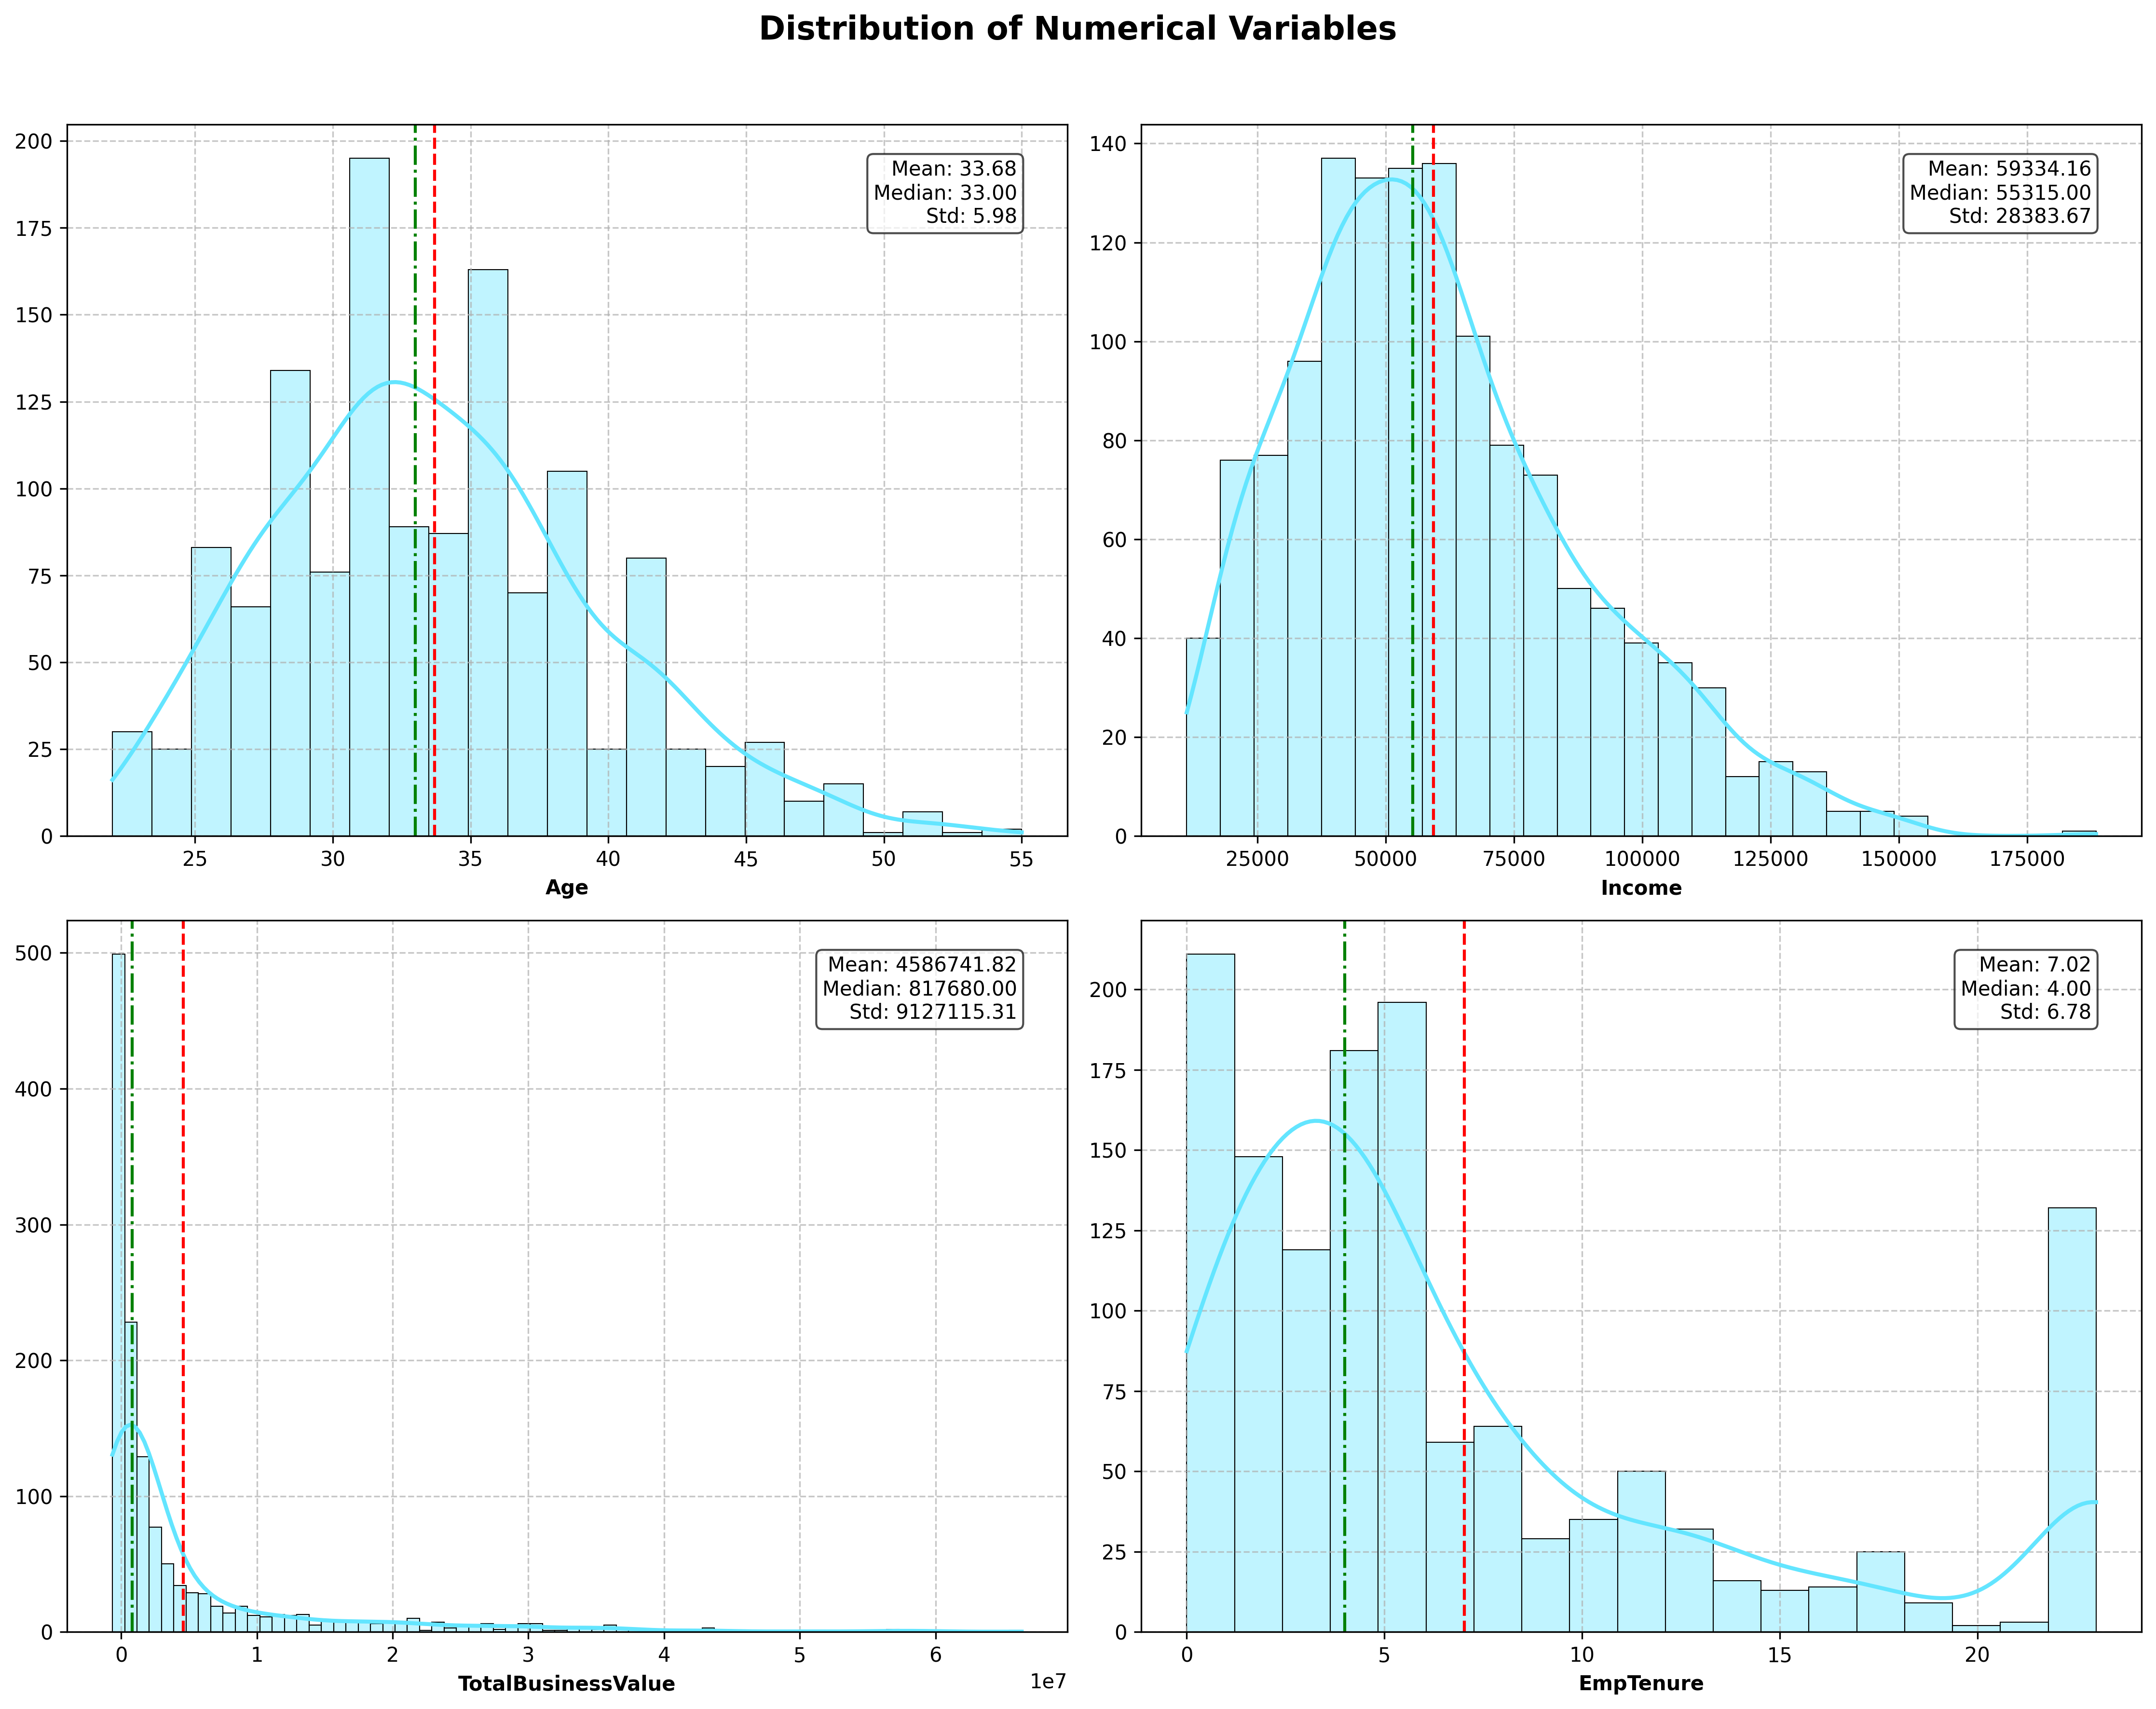

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_features = len(vars_numerical)
n_rows, n_cols = 2, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 12), dpi=300)
ax = ax.flatten()

# Create histograms with KDE for numerical variables
for i, column in enumerate(vars_numerical):
    sns.histplot(X_train[column], 
                edgecolor="black", 
                linewidth=0.5, 
                alpha=0.4, 
                kde=True, 
                color="#63E5FF", 
                line_kws={"color": "#0066CC", "lw": 2}, 
                stat="count",
                ax=ax[i])
    
    # Add mean and median lines
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    # Add vertical lines for mean and median
    ax[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    ax[i].axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f'Median: {median_val:.2f}')
    
    # Add descriptive statistics as text
    stats_text = f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd: {df[column].std():.2f}"
    ax[i].text(0.95, 0.95, stats_text, transform=ax[i].transAxes, 
              fontsize=10, va='top', ha='right', 
              bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    ax[i].set_xlabel(column, fontweight='bold')
    ax[i].set_ylabel("")  # Removed y-axis label
    ax[i].set_title("")   # Removed subplot title
    ax[i].grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(n_features, n_rows * n_cols):
    ax[j].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### *Observations*

#### *Age Distribution*

- Most drivers are between 25-40 years old

- Mean (33.68) > Median (33.00) (Confirms slight right skew)

- Highest concentration around 30-35 years

- Some older drivers (45-55 years) but relatively few

- **Business implication**: Core workforce is young to middle-aged adults

#### *Income Distribution*

- Mean (59,334) > Median (55,315)

- Standard deviation of ~29,984 indicates considerable income variation

- Most drivers earn between 25,000-100,000, with peak around 50,000-60,000

- **Business implication**: Wide income range suggests varying levels of success/opportunity

#### *TotalBusinessValue Distribution*

- Vast majority of values concentrated near zero – Extremely right-skewed

- Mean (4,586,742) >> Median (817,680) (Huge mean-median gap)

- Standard deviation (9,127,115) nearly twice the mean

- Few drivers generate extremely high business value

- **Business implication**: Revenue contribution is highly uneven; small percentage of drivers likely generate majority of business

#### *EmpTenure Distribution*

- Shows peaks at low tenure (~1-2 years) and very high tenure (~20+ years)

- Mean (7.02) > Median (4.00)** (Long-tenured drivers pull the mean up)

- Gap in middle tenures. Fewer drivers in the 10-18 year range.

- **Business implication**: Workforce consists of newer drivers and very experienced ones, with potential retention issues in the middle tenure range

### Strategic Insights

- **Driver Demographics:** The workforce is predominantly young to middle-aged, suggesting recruitment strategies should target this age group.

- **Income Disparity:** There's significant variation in driver income, which could indicate differences in hours worked, efficiency, or assignment algorithms.

- **Career Growth:** Most drivers haven't received promotions, indicating limited career advancement opportunities which could contribute to churn.

- **Tenure Pattern:** The bimodal distribution in tenure suggests potential issues with retention after the initial months, but also shows a stable group of long-term drivers.

- **Performance Ratings:** The concentration of lower ratings could indicate either strict evaluation criteria or genuine performance issues that might need addressing through training programs.

By acknowledging these patterns, the business can better understand the driver behaviour, implement churn prediction with confidence and develop targeted retention strategies.

## b) *Univariate Analysis – Categorical Variables*

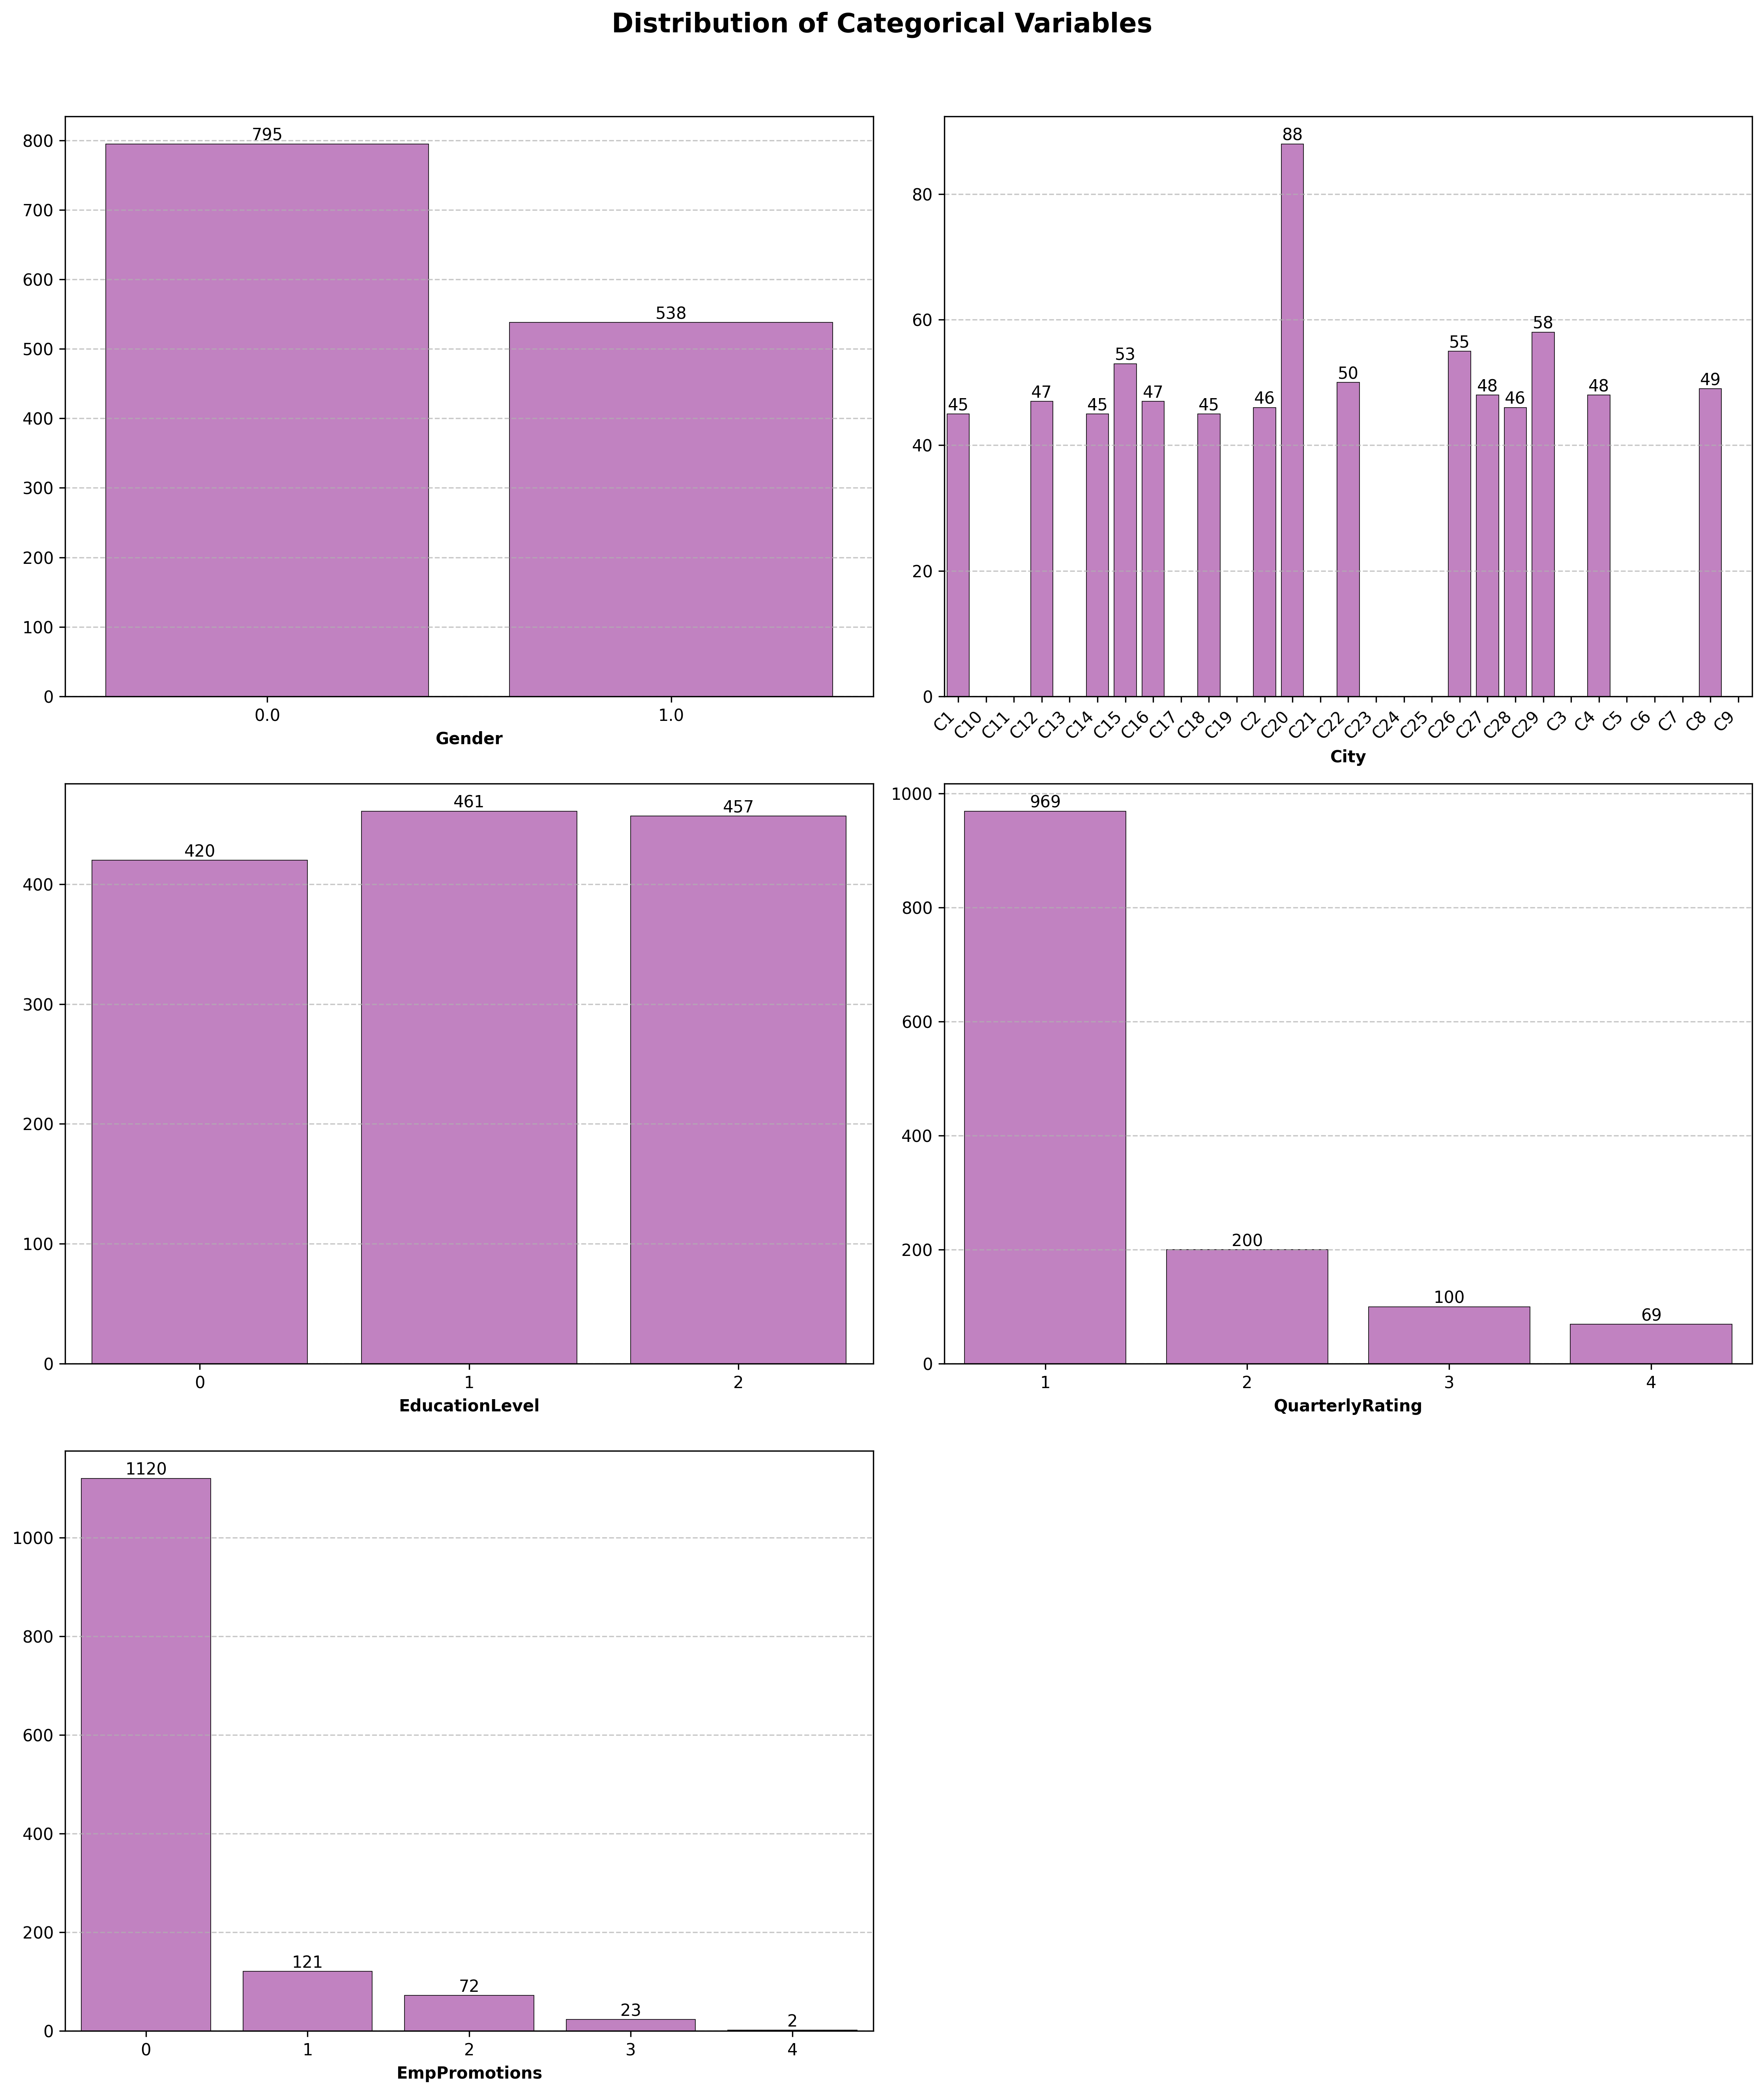

In [82]:
n_features = len(vars_categorical)
n_rows, n_cols = 3, 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 18), dpi=300)
ax = ax.flatten()

# Create count plots for categorical variables
color_palette = ["#CC77CC"]

for i, column in enumerate(vars_categorical):
    # Get value counts and sort for better visualization
    value_counts = X_train[column].value_counts().sort_values(ascending=False)
    
    # Create a temporary DataFrame for plotting
    temp_df = pd.DataFrame({'category': value_counts.index, 'count': value_counts.values})
    
    # Limit to top 15 categories if there are many unique values
    if len(value_counts) > 15 and column == 'City':
        temp_df = temp_df.head(15)
    
    # Use the updated approach to set color
    sns.barplot(x='category', y='count', data=temp_df, 
               ax=ax[i], color=color_palette[i % len(color_palette)], 
               edgecolor="black", linewidth=0.4)
    
    # Add count labels on top of bars
    for p in ax[i].patches:
        ax[i].annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'bottom', fontsize=10, rotation=0)
    
    ax[i].set_xlabel(column, fontweight='bold')
    ax[i].set_ylabel("")
    ax[i].set_title("")
    ax[i].grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels if there are many categories
    if len(value_counts) > 5:
        plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')

# Hide any unused subplots
for j in range(n_features, n_rows * n_cols):
    ax[j].axis('off')

plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### *Observations*

#### Gender (0, 1)

- Gender Disparity: Male-to-Female Ratio is approximately 60-40, suggests severe imbalance in the driver workforce

#### City (C1 to C29)

- Highly uneven distribution across approximately 30 cities

- C_15 is the dominant city with 88 drivers

- Most cities have between 40-60 drivers each

#### EducationLevel (0, 1, 2)

- Relatively balanced distribution across three education levels

- The close distribution suggests education level may not be a strong differentiating factor

#### QuarterlyRating (1-4)

- 73% have Rating 1 whereas only 5% have Rating 4, i.e. vast majority of drivers have the lowest possible rating. 

#### EmpPromotions (0-4)

- Career stagnation: The vast majority of drivers never receive a promotion

- **Business implication**: Limited career growth opportunities may contribute to churn

### *Strategic Insights*

- **Career advancement is rare**: The promotion data shows minimal upward mobility for most drivers

- **Geographic concentration**: Operations are spread across many cities but with one dominant hub

- **Gender diversity gap**: There appears to be a gender imbalance in the driver workforce

- **Education level seems less impactful**: The relatively even distribution across education levels suggests this may not be a key differentiator

These categorical patterns can provide valuable context for the churn prediction model and highlight potential areas for organizational improvement.

### c) *Bivariate Analysis – Numerical Variables by Churn Status*

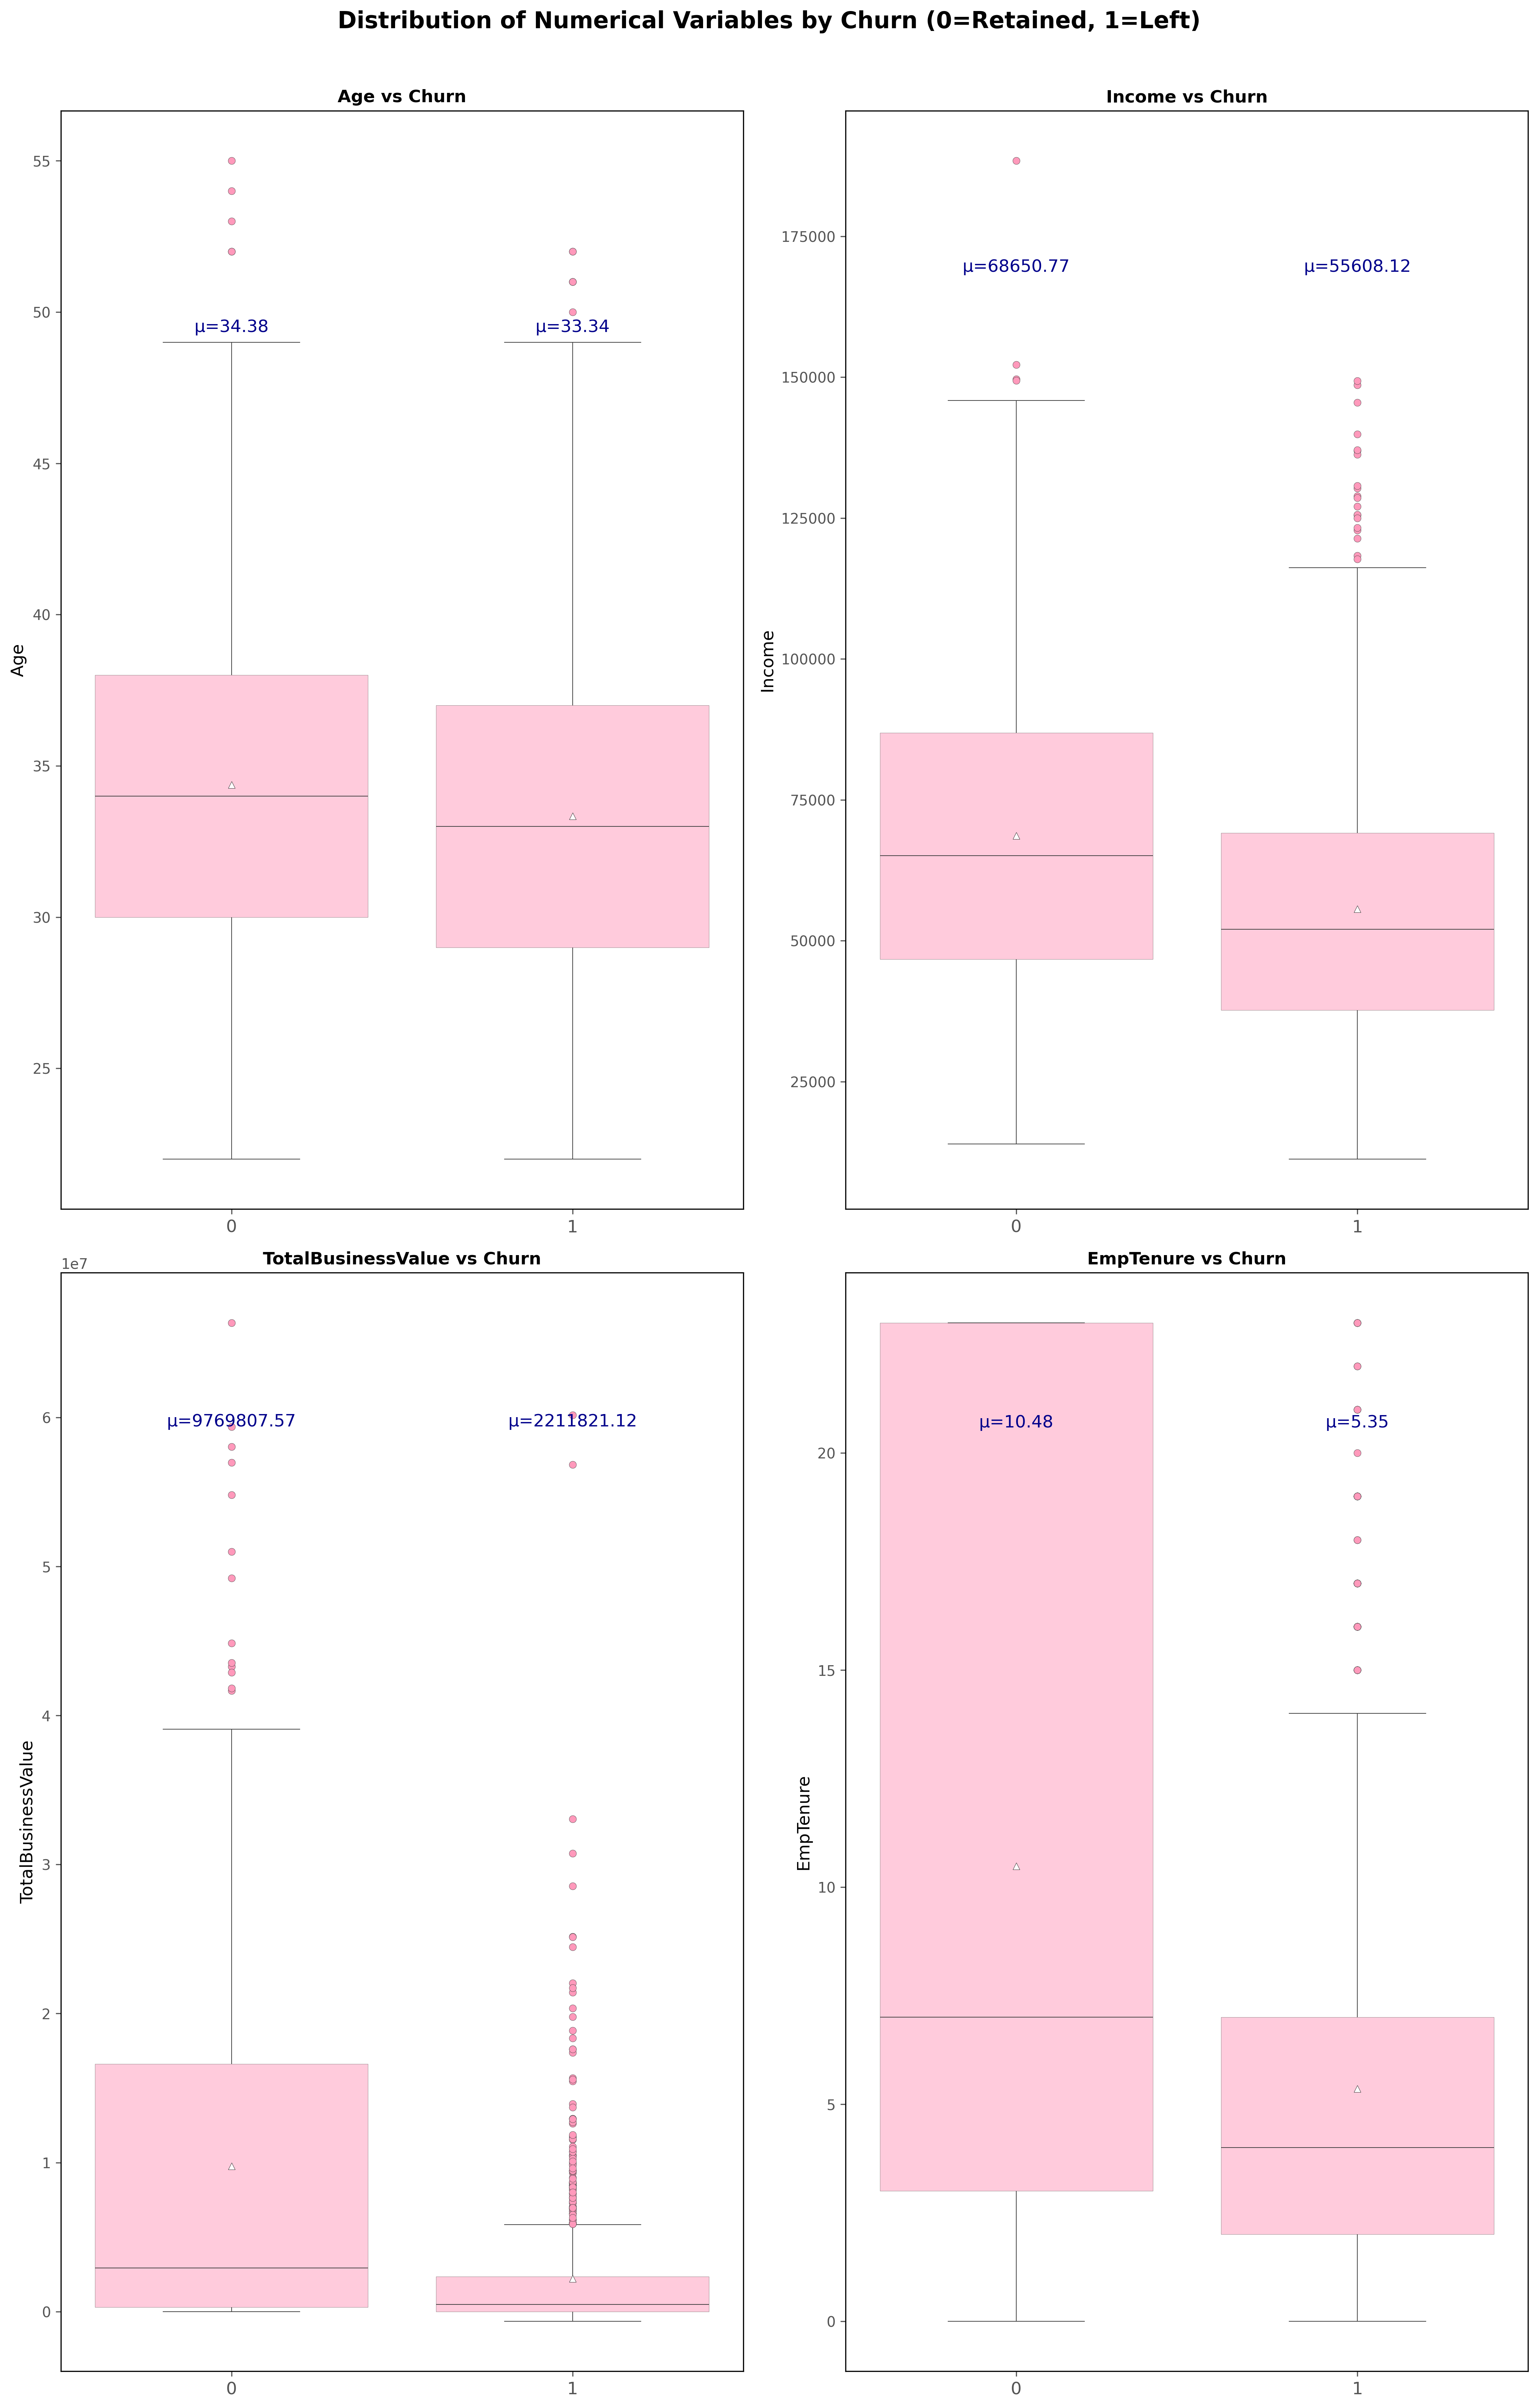

In [83]:
# Define a custom boxplot function with improved styling
def boxplot(data, x, y, color="lightblue", ax=None):
    sns.boxplot(ax=ax,
                x=x,
                y=y,
                data=data,
                linewidth=0.5,
                showmeans=True,
                boxprops={'facecolor': color, 
                          'edgecolor': 'black', 
                          'linewidth': 0.2, 
                          'alpha': 0.5},
                meanprops={'markerfacecolor': 'white', 
                           'markeredgecolor': 'black', 
                           'marker': '^', 
                           'markeredgewidth': 0.2, 
                           'markersize': 5}, 
                flierprops={'marker': 'o', 
                            'markerfacecolor': color, 
                            'markersize': 5, 
                            'markeredgewidth': 0.2},
                legend=False)

# Create a DataFrame that combines X_train and y_train for EDA
# This prevents data leakage by only using training data for analysis
train_df = X_train.copy()
train_df['Churn'] = y_train

fig, axes = plt.subplots(2, 2, figsize=(15, 24), dpi=300)
axes = axes.flatten()

# Define a color palette for visual appeal
colour_sequence = ['#FF99BB']

# Loop through numerical variables and create boxplots
for i, var in enumerate(vars_numerical):
    if i < len(axes):
        boxplot(data=train_df, x='Churn', y=var, color=colour_sequence[i % len(colour_sequence)], ax=axes[i])
        axes[i].set_title(f'{var} vs Churn', fontsize=12, fontweight='bold')
        
        # Add mean values as text annotations
        churn_0_mean = train_df[train_df['Churn'] == 0][var].mean()
        churn_1_mean = train_df[train_df['Churn'] == 1][var].mean()
        axes[i].text(0, train_df[var].max()*0.9, f'μ={churn_0_mean:.2f}', 
                    ha='center', va='center', fontsize=12, color='darkblue')
        axes[i].text(1, train_df[var].max()*0.9, f'μ={churn_1_mean:.2f}', 
                    ha='center', va='center', fontsize=12, color='darkblue')
        
        # Customize tick parameters
        axes[i].tick_params(axis='x', labelsize=12, colors='#555555')
        axes[i].tick_params(axis='y', labelsize=10, colors='#555555')
        axes[i].set_xlabel(None)
        axes[i].set_ylabel(var, fontsize=12)

# Hide any unused subplots
for i in range(len(vars_numerical), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distribution of Numerical Variables by Churn (0=Retained, 1=Left)', 
             fontsize=16, fontweight='bold', y=0.97)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### *Observations*

#### Age vs Churn

- **Similar medians**: Both retained (0) and churned (1) drivers have median ages around 33-34 years

- **Similar distributions**: Box plots show comparable spreads and quartiles

- **Minimal difference**: Age appears to have little relationship with churn behavior

- **Business implication**: Age alone is not a strong predictor of driver retention

#### Income vs Churn

- **Significant difference**: Retained drivers (μ=58,650) have higher median income than churned drivers (μ=55,608)

- **Wider spread for retained**: Retained drivers show greater income variability

- **Higher outliers for retained**: Several high-income outliers in the retained group

- **Business insight**: Higher income correlates with better retention, suggesting compensation is a key factor

#### TotalBusinessValue vs Churn

- **Major difference**: Retained drivers generate substantially higher business value (μ=976,807) than churned drivers (μ=221,742)

- **Higher variance for retained**: Much wider spread in business value for retained drivers

- **Outlier pattern**: Both groups have high outliers, but retained drivers have more extreme ones

- **Business insight**: Drivers who generate more revenue for Ola are significantly more likely to stay

#### EmpTenure vs Churn

- **Dramatic difference**: Retained drivers have much longer tenure (μ=10.48) than churned drivers (μ=5.35)

- **Distribution shape**: Retained drivers show a wide, possibly bimodal distribution

- **Churned concentration**: Most churned drivers have relatively short tenures

- **Critical insight**: There appears to be a "danger zone" in early tenure where churn risk is highest

## *Strategic Implications*

- **Income matters**: Higher compensation appears to improve retention

- **Business value correlation**: Drivers who generate more revenue are more likely to stay

- **Early tenure vulnerability**: The first few years show highest churn risk

- **Age-neutral churn**: Age doesn't appear to be a significant factor in retention

These insights suggest focusing retention strategies on:
- Improving income opportunities for newer drivers
- Supporting drivers through the critical early tenure period
- Understanding what enables some drivers to generate higher business value
- Creating clearer career progression paths to extend tenure

### d) *Bivariate Analysis – Categorical Variables by Churn Status*

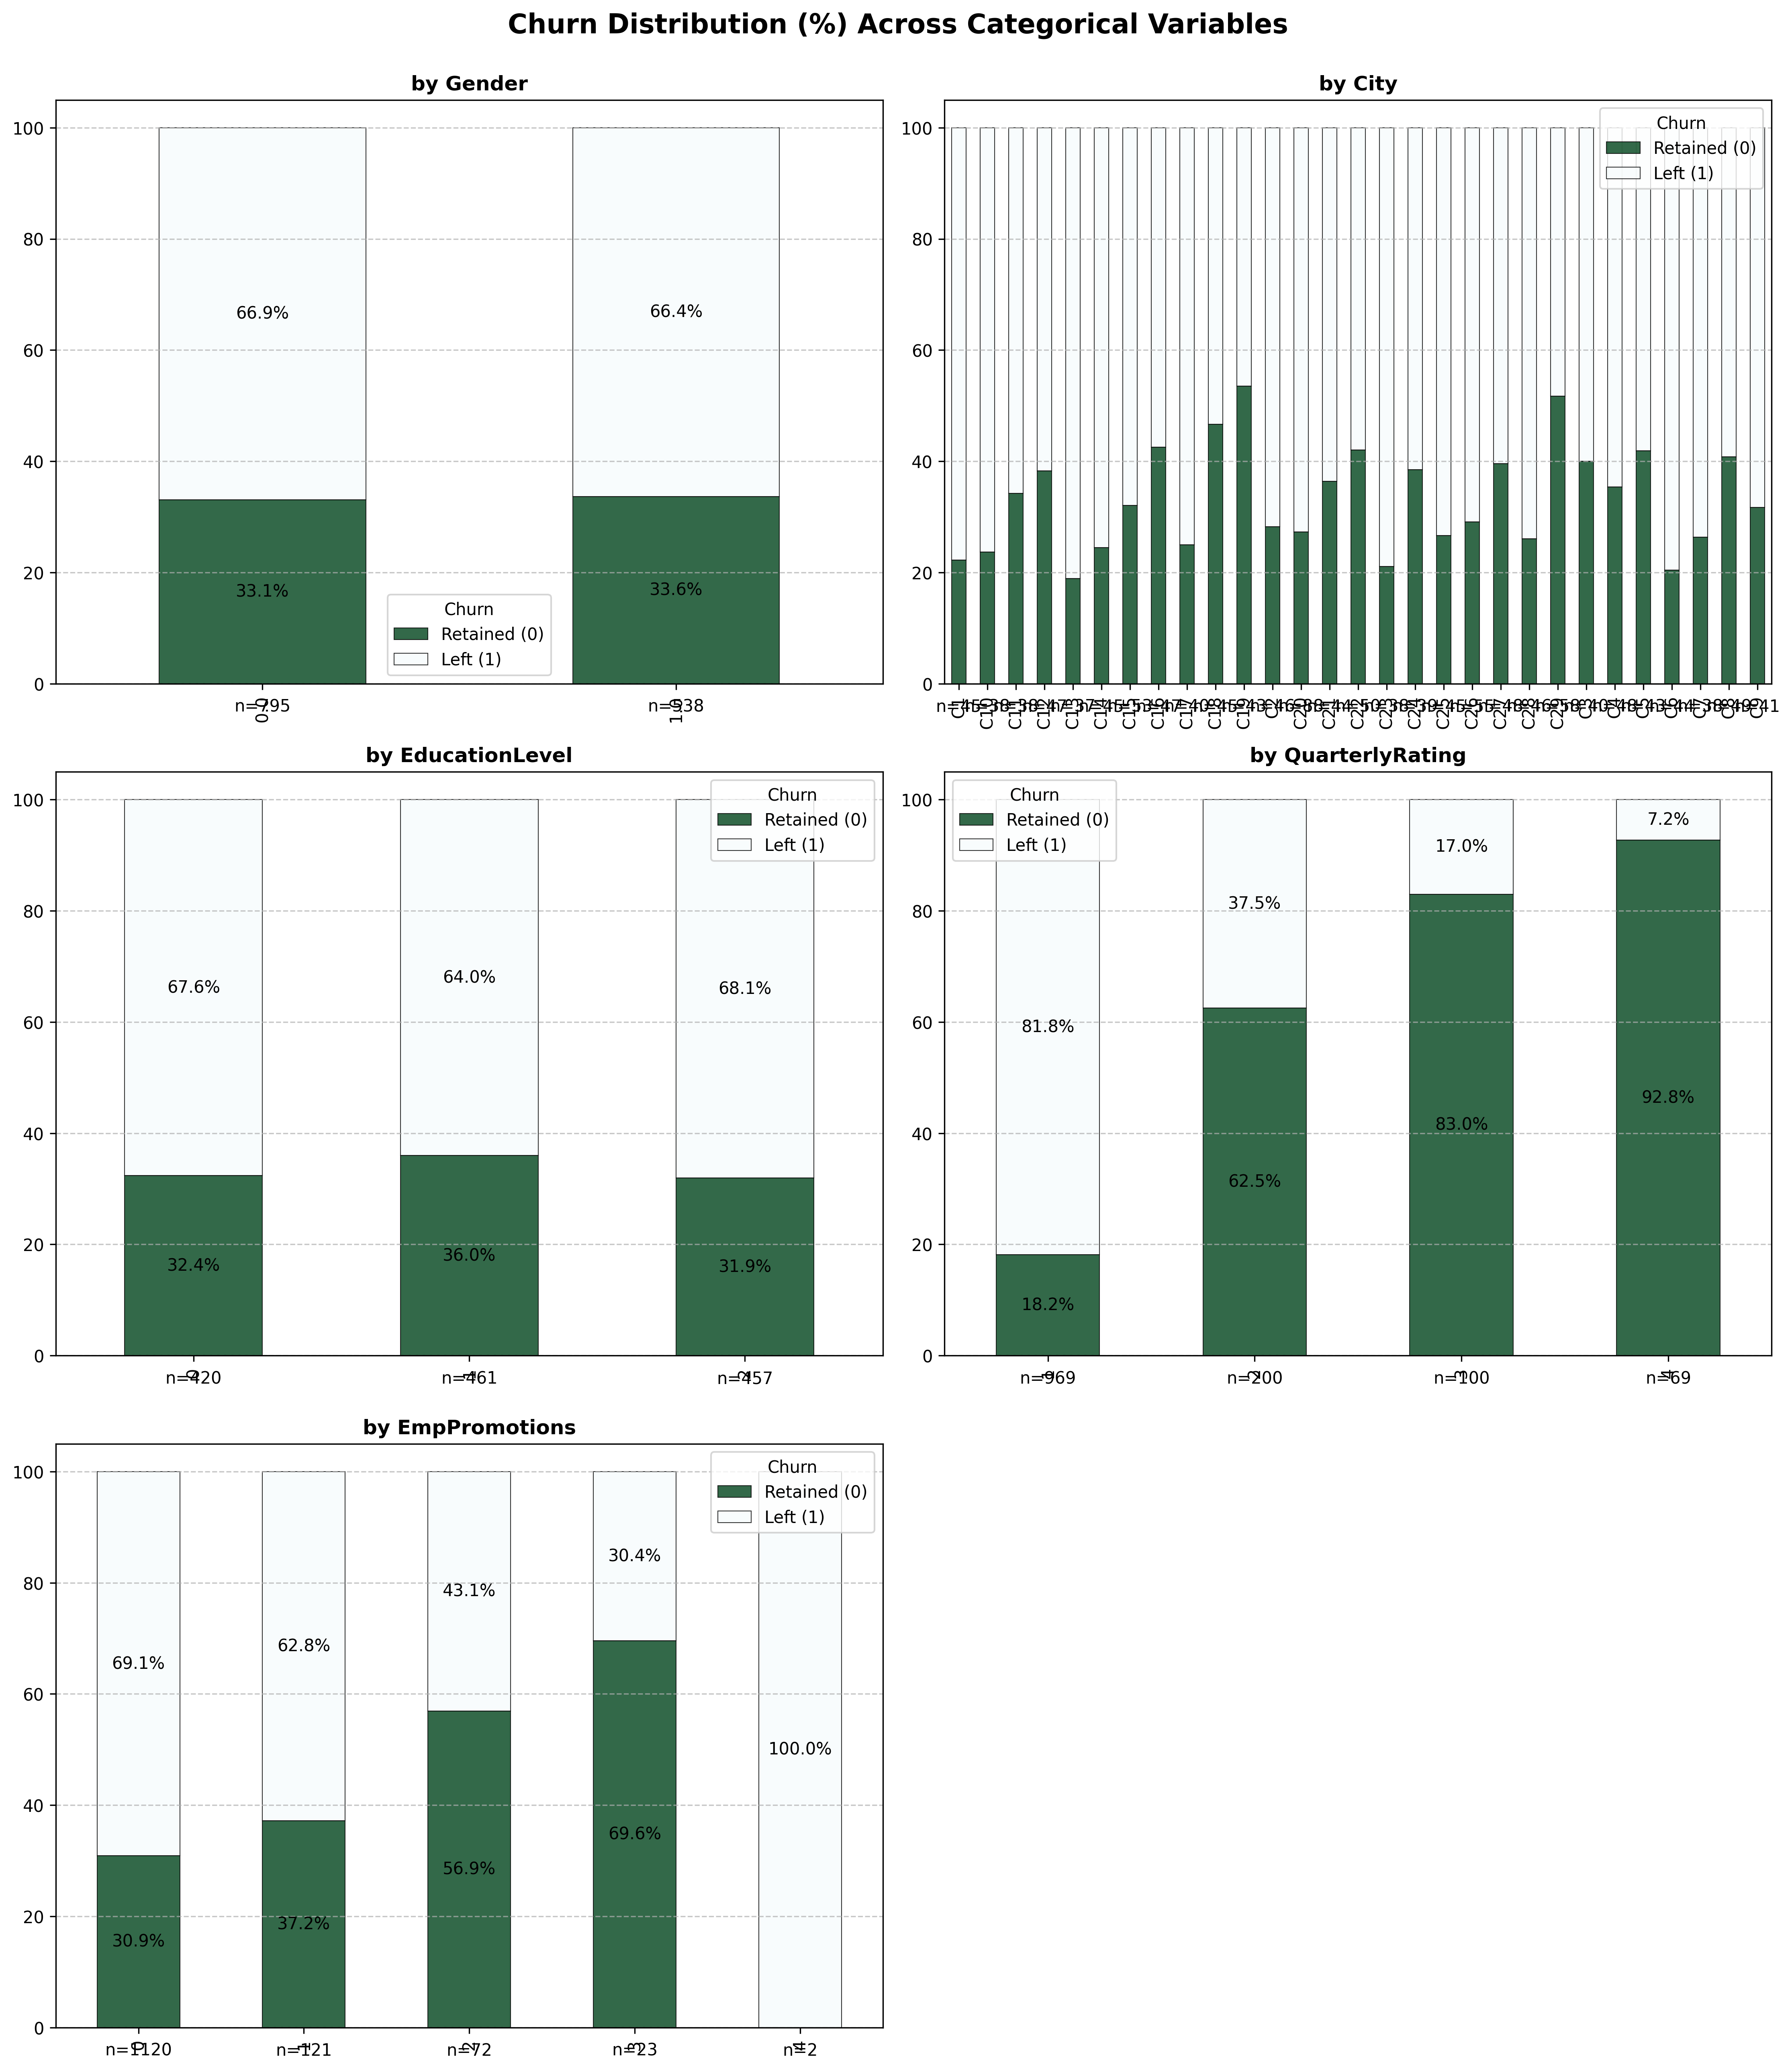

In [84]:
# Stacked bar charts for categorical variables vs. churn
fig, axes = plt.subplots(3, 2, figsize=(15, 18), dpi=300)
axes = axes.flatten()

for i, var in enumerate(vars_categorical):
    # Create a cross-tabulation of the categorical variable and churn
    crosstab = pd.crosstab(X_train[var], y_train)
    
    # Calculate percentages
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
    
    # Plot stacked bar chart
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[i], 
                     colormap='BuGn_r', alpha=0.8,
                     edgecolor='black', linewidth=0.5)
    
    # Add percentage labels on bars
    for c in axes[i].containers:
        if len(c.datavalues) < 10:
            axes[i].bar_label(c, labels=[f'{v:.1f}%' if v > 5 else '' for v in c.datavalues], 
                             label_type='center', fontsize=10)
    
    # Add count information as text
    for j, (idx, row) in enumerate(crosstab.iterrows()):
        total = row.sum()
        axes[i].text(j, -5, f'n={total}', ha='center', fontsize=10)
    
    axes[i].set_title(f'by {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(None)
    axes[i].legend(title='Churn', labels=['Retained (0)', 'Left (1)'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(len(vars_categorical), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Churn Distribution (%) Across Categorical Variables', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### *Observations*

#### Gender

- **No gender difference in churn**: Both genders show identical retention rates (33.3% vs 33.6%)

- **Business implication**: Gender is not a factor in driver retention

#### City

- **Significant geographic variation**: Retention rates vary widely across cities (20-55%)

- **Best retention cities**: Several cities show retention rates above 40% (notably C15, C7, C19)

- **Worst retention cities**: Some cities have retention below 25% (C2, C6, C22)

- **Business insight**: Local market conditions or management practices likely influence retention

#### Education Level

- **Slight variation**: Education level 1 shows modestly better retention (36.0%) compared to levels 0 (32.4%) and 2 (31.9%)

- **Business implication**: Education has minimal impact on retention, with middle education level performing marginally better

#### Quarterly Rating

- **Strong positive correlation**: Higher ratings dramatically improve retention

  - Rating 1: Only 18.2% retention (81.8% churn)

  - Rating 2: 62.5% retention (37.5% churn)

  - Rating 3: 83.0% retention (17.0% churn)

  - Rating 4: 92.8% retention (7.2% churn)

- **Critical insight**: Driver rating is a powerful predictor of retention

#### Employee Promotions

- **Clear positive correlation**: More promotions = better retention

  - 0 promotions: 30.9% retention (69.1% churn)

  - 1 promotion: 37.2% retention (62.8% churn)

  - 2 promotions: 56.9% retention (43.1% churn)

  - 3 promotions: 69.6% retention (30.4% churn)

  - 4 promotions: 100% retention (0% churn)

- **Business insight**: Career advancement significantly improves retention

### *Strategic Implications*

- **Rating system is critical**: The dramatic correlation between ratings and retention suggests either:

   - Higher-rated drivers are more satisfied and stay longer

   - Or the rating system effectively identifies drivers at risk of leaving

- **Career progression works**: Each promotion substantially increases retention probability

- **Geographic targeting needed**: Focus retention efforts on underperforming cities

- **Gender-neutral approach**: Retention strategies need not be gender-specific

These insights strongly suggest that focusing on improving driver ratings and creating more promotion opportunities would be the most effective retention strategies.

### e) *Multivariate Analysis – Correlations between Numerical Features and Churn*

Age  Income  TotalBusinessValue  EmpTenure  Churn
Age                 1.00    0.19                0.27       0.29  -0.08
Income              0.19    1.00                0.38       0.27  -0.22
TotalBusinessValue  0.27    0.38                1.00       0.80  -0.39
EmpTenure           0.29    0.27                0.80       1.00  -0.36
Churn              -0.08   -0.22               -0.39      -0.36   1.00

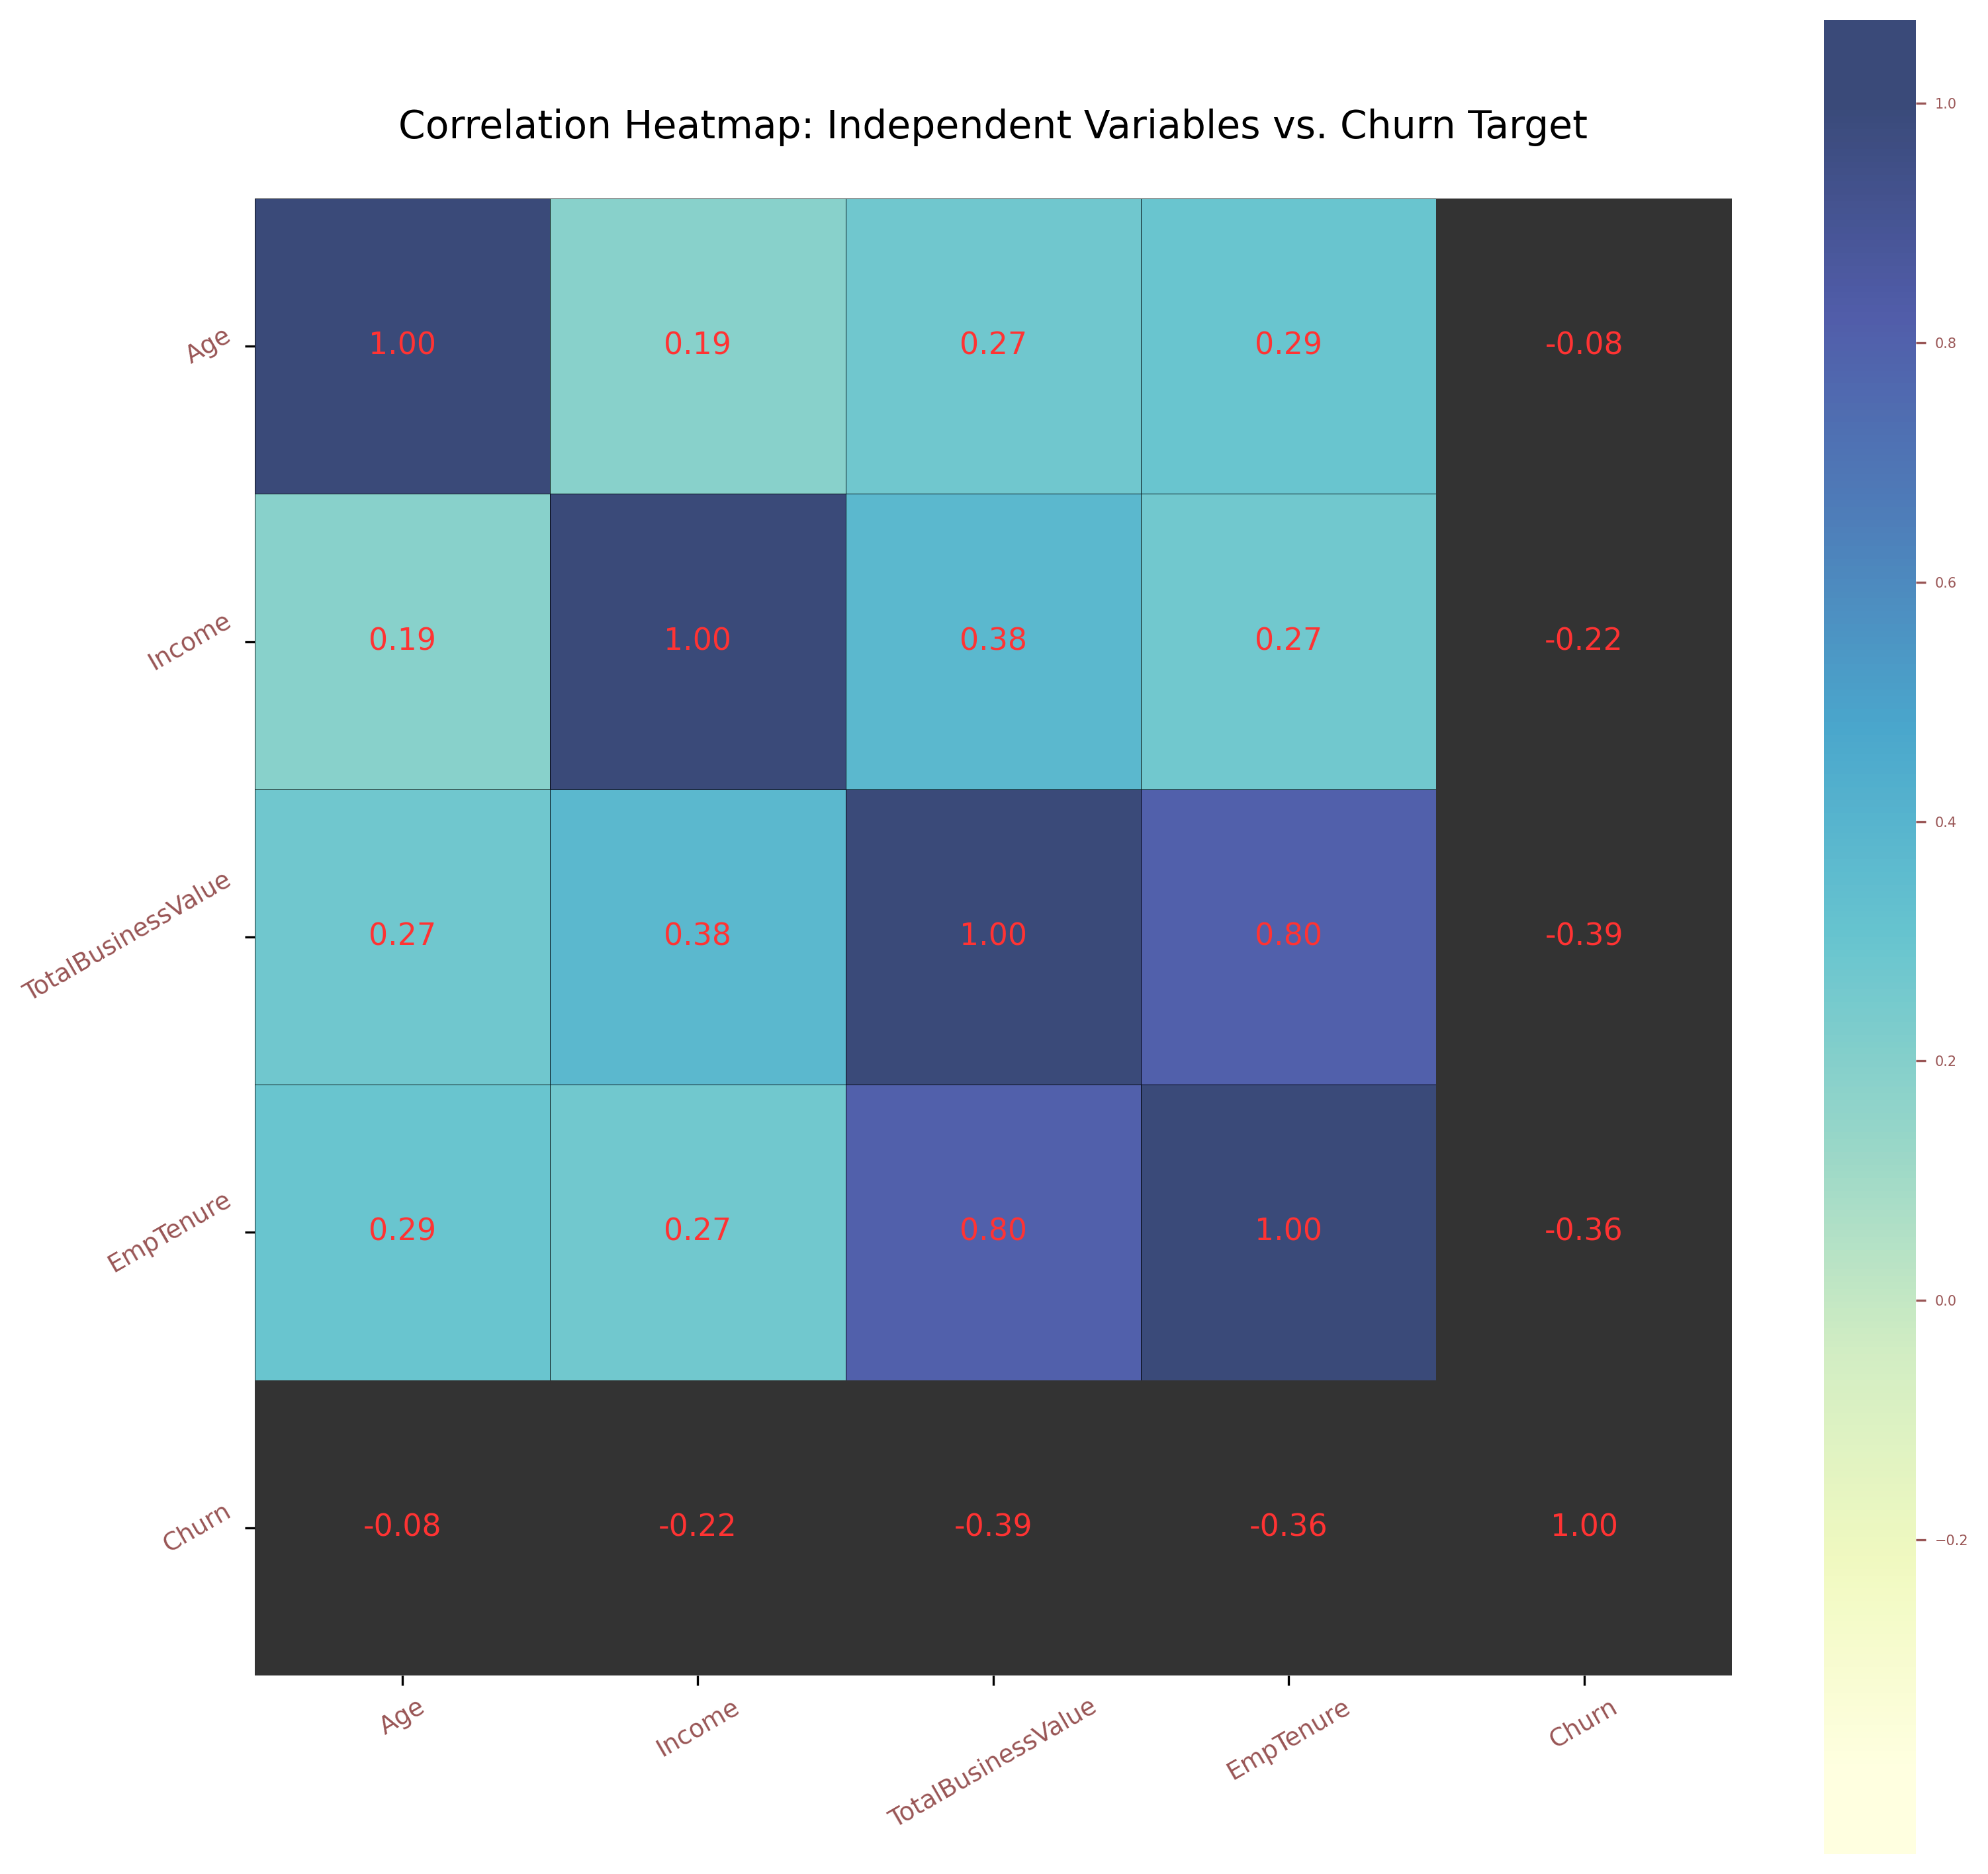

In [85]:
import matplotlib.patches as patches

corr_matrix = pd.concat([X_train[vars_numerical], y_train], axis=1).corr()

vmin = corr_matrix.min().min()
vmax = 1.0
center = vmin + (vmax - vmin)/2

plt.figure(figsize=(12, 12), dpi=300)
ax = sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        linecolor='black',
        linewidths=0.2,
        square=True,
        alpha=0.8,
        mask=None,
        annot_kws={"size": 11, "color": '#ff3333'},
        vmin=vmin,
        center=center,
        vmax=vmax,
        cmap='YlGnBu',
        cbar_kws={"shrink": 1.0, "extend": "both", "extendfrac": 0.05, "extendrect": True})

target_idx = corr_matrix.columns.get_loc('Churn')

ax.add_patch(
    patches.Rectangle(
        (0, target_idx), len(corr_matrix.columns), 1,
        fill=True, color='#333333', alpha=1.0, lw=0))
ax.add_patch(
    patches.Rectangle(
        (target_idx, 0), 1, len(corr_matrix.columns),
        fill=True, color='#333333', alpha=1.0, lw=0))

plt.title("Correlation Heatmap: Independent Variables vs. Churn Target\n", fontsize=14)
plt.xticks(fontsize=9, rotation=30, color='#995555')
plt.yticks(fontsize=9, rotation=30, color='#995555')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=5, colors='#995555')

display(round(corr_matrix, 2))

plt.show()

### *Observations*

#### Numerical Variables vs Churn

- **TotalBusinessValue (-0.39)**: Strongest negative correlation with churn

   - Higher business value strongly predicts driver retention

   - Drivers generating more revenue are significantly less likely to leave

   - This aligns with the boxplot analysis showing retained drivers generate more value

- **EmpTenure (-0.36)**: Second strongest predictor

   - Longer-tenured drivers are much less likely to churn

   - This suggests a critical "survival curve" where retention improves with time

   - Confirms the boxplot finding of shorter tenure among churned drivers

- **Income (-0.22)**: Moderate negative correlation

   - Higher income is associated with better retention

   - Effect is meaningful but less dramatic than business value or tenure

   - Validates the income difference observed in the boxplots

- **Age (-0.08)**: Minimal correlation

   - Age has negligible relationship with churn

   - Confirms the boxplot observation that age distributions are similar between groups

   - Age is the least useful numerical predictor

#### Inter-Feature Relationships

- **TotalBusinessValue & EmpTenure (0.60)**: Strong positive correlation

   - Longer-tenured drivers generate substantially more business value

   - This creates a virtuous cycle: tenure → value → retention

   - May indicate experience leads to efficiency and higher earnings

- **TotalBusinessValue & Income (0.38)**: Moderate positive correlation

   - Drivers generating more value tend to earn more

   - Suggests a performance-based compensation component

   - Creates another reinforcing cycle: value → income → retention

- **Age & Other Variables (0.19-0.29)**: Weak positive correlations

   - Age has modest positive relationships with all other numerical variables

   - Slightly older drivers tend to have marginally higher tenure, income, and business value

   - Effect is present but not strong enough to impact churn directly

### *Strategic Implications*

- **Focus on business value drivers**: The strongest predictor of retention is how much value a driver generates for Ola

- **Early tenure intervention**: The strong tenure-retention relationship suggests focusing retention efforts on newer drivers

- **Income matters**: While not the strongest factor, compensation still shows meaningful correlation with retention

- **Age-neutral approach**: Minimal age correlation confirms retention strategies should not be age-targeted

These correlation findings, combined with the categorical analysis, suggest a comprehensive retention strategy focusing on driver ratings, promotion opportunities, business value generation, and early-tenure support.

_____
# 6. Ensemble Learning Model Building

In [92]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
import squarify

In [93]:
def plot_learning_curves(train_sizes, train_scores, test_scores, model_name='Model', scoring='ROC AUC'):
    """
    Create learning curve plot and return the figure without displaying it.
    
    Parameters:
    -----------
    train_sizes : array-like
        Training set sizes
    train_scores : array-like
        Training scores for each training size
    test_scores : array-like
        Cross-validation scores for each training size
    model_name : str, default='Model'
        Name of the model for the plot title
    scoring : str, default='ROC AUC'
        Name of the scoring metric used
        
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The figure object containing the learning curve plot
    data : dict
        Dictionary containing processed learning curve data
    """
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training set')
    ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.15)
    
    ax.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Cross-validation set')
    ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)
    
    ax.set_title(f'Learning Curves ({model_name})')
    ax.set_xlabel('Training set size')
    ax.set_ylabel(f'Score ({scoring})')
    ax.legend(loc='best')
    ax.grid(True)
    
    plt.close(fig)
    
    return fig

def plot_feature_importance_treemap(features, importances, model_name, top_n=8):
    """
    Create a treemap visualization of feature importance for a given model.
    
    Parameters:
    -----------
    model : fitted model object
        The trained model with feature_importances_ attribute
    features : list or array-like
        The entire list of features used for training, needed for column names
    model_name : str
        Name of the model to display in the title
    top_n : int, default=8
        Number of top features to display
    """
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=False)
    feature_importance = feature_importance.head(top_n)

    plt.figure(figsize=(12, 8), dpi=300)
    colors = plt.cm.Blues_r(np.linspace(0.0, 0.95, len(feature_importance)))
    squarify.plot(sizes=feature_importance['importance'], 
                  label=[f"{f}\n{i*100:.1f}%" for f, i in zip(feature_importance['feature'], feature_importance['importance'])], 
                  color=colors, 
                  alpha=0.8, 
                  edgecolor='white', 
                  linewidth=3, 
                  text_kwargs={'fontsize': 12, 'color': '#ffffff'})
    
    plt.title(f'Top {top_n} Features by Importance ({model_name})', fontsize=20, y=1.01)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## **Random Forest**

Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10, 'class_weight': 'balanced'}
Best cross-validation score: 0.8861

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       124
           1       0.84      0.85      0.84       323

    accuracy                           0.77       447
   macro avg       0.71      0.71      0.71       447
weighted avg       0.77      0.77      0.77       447

ROC-AUC Score: 0.8080


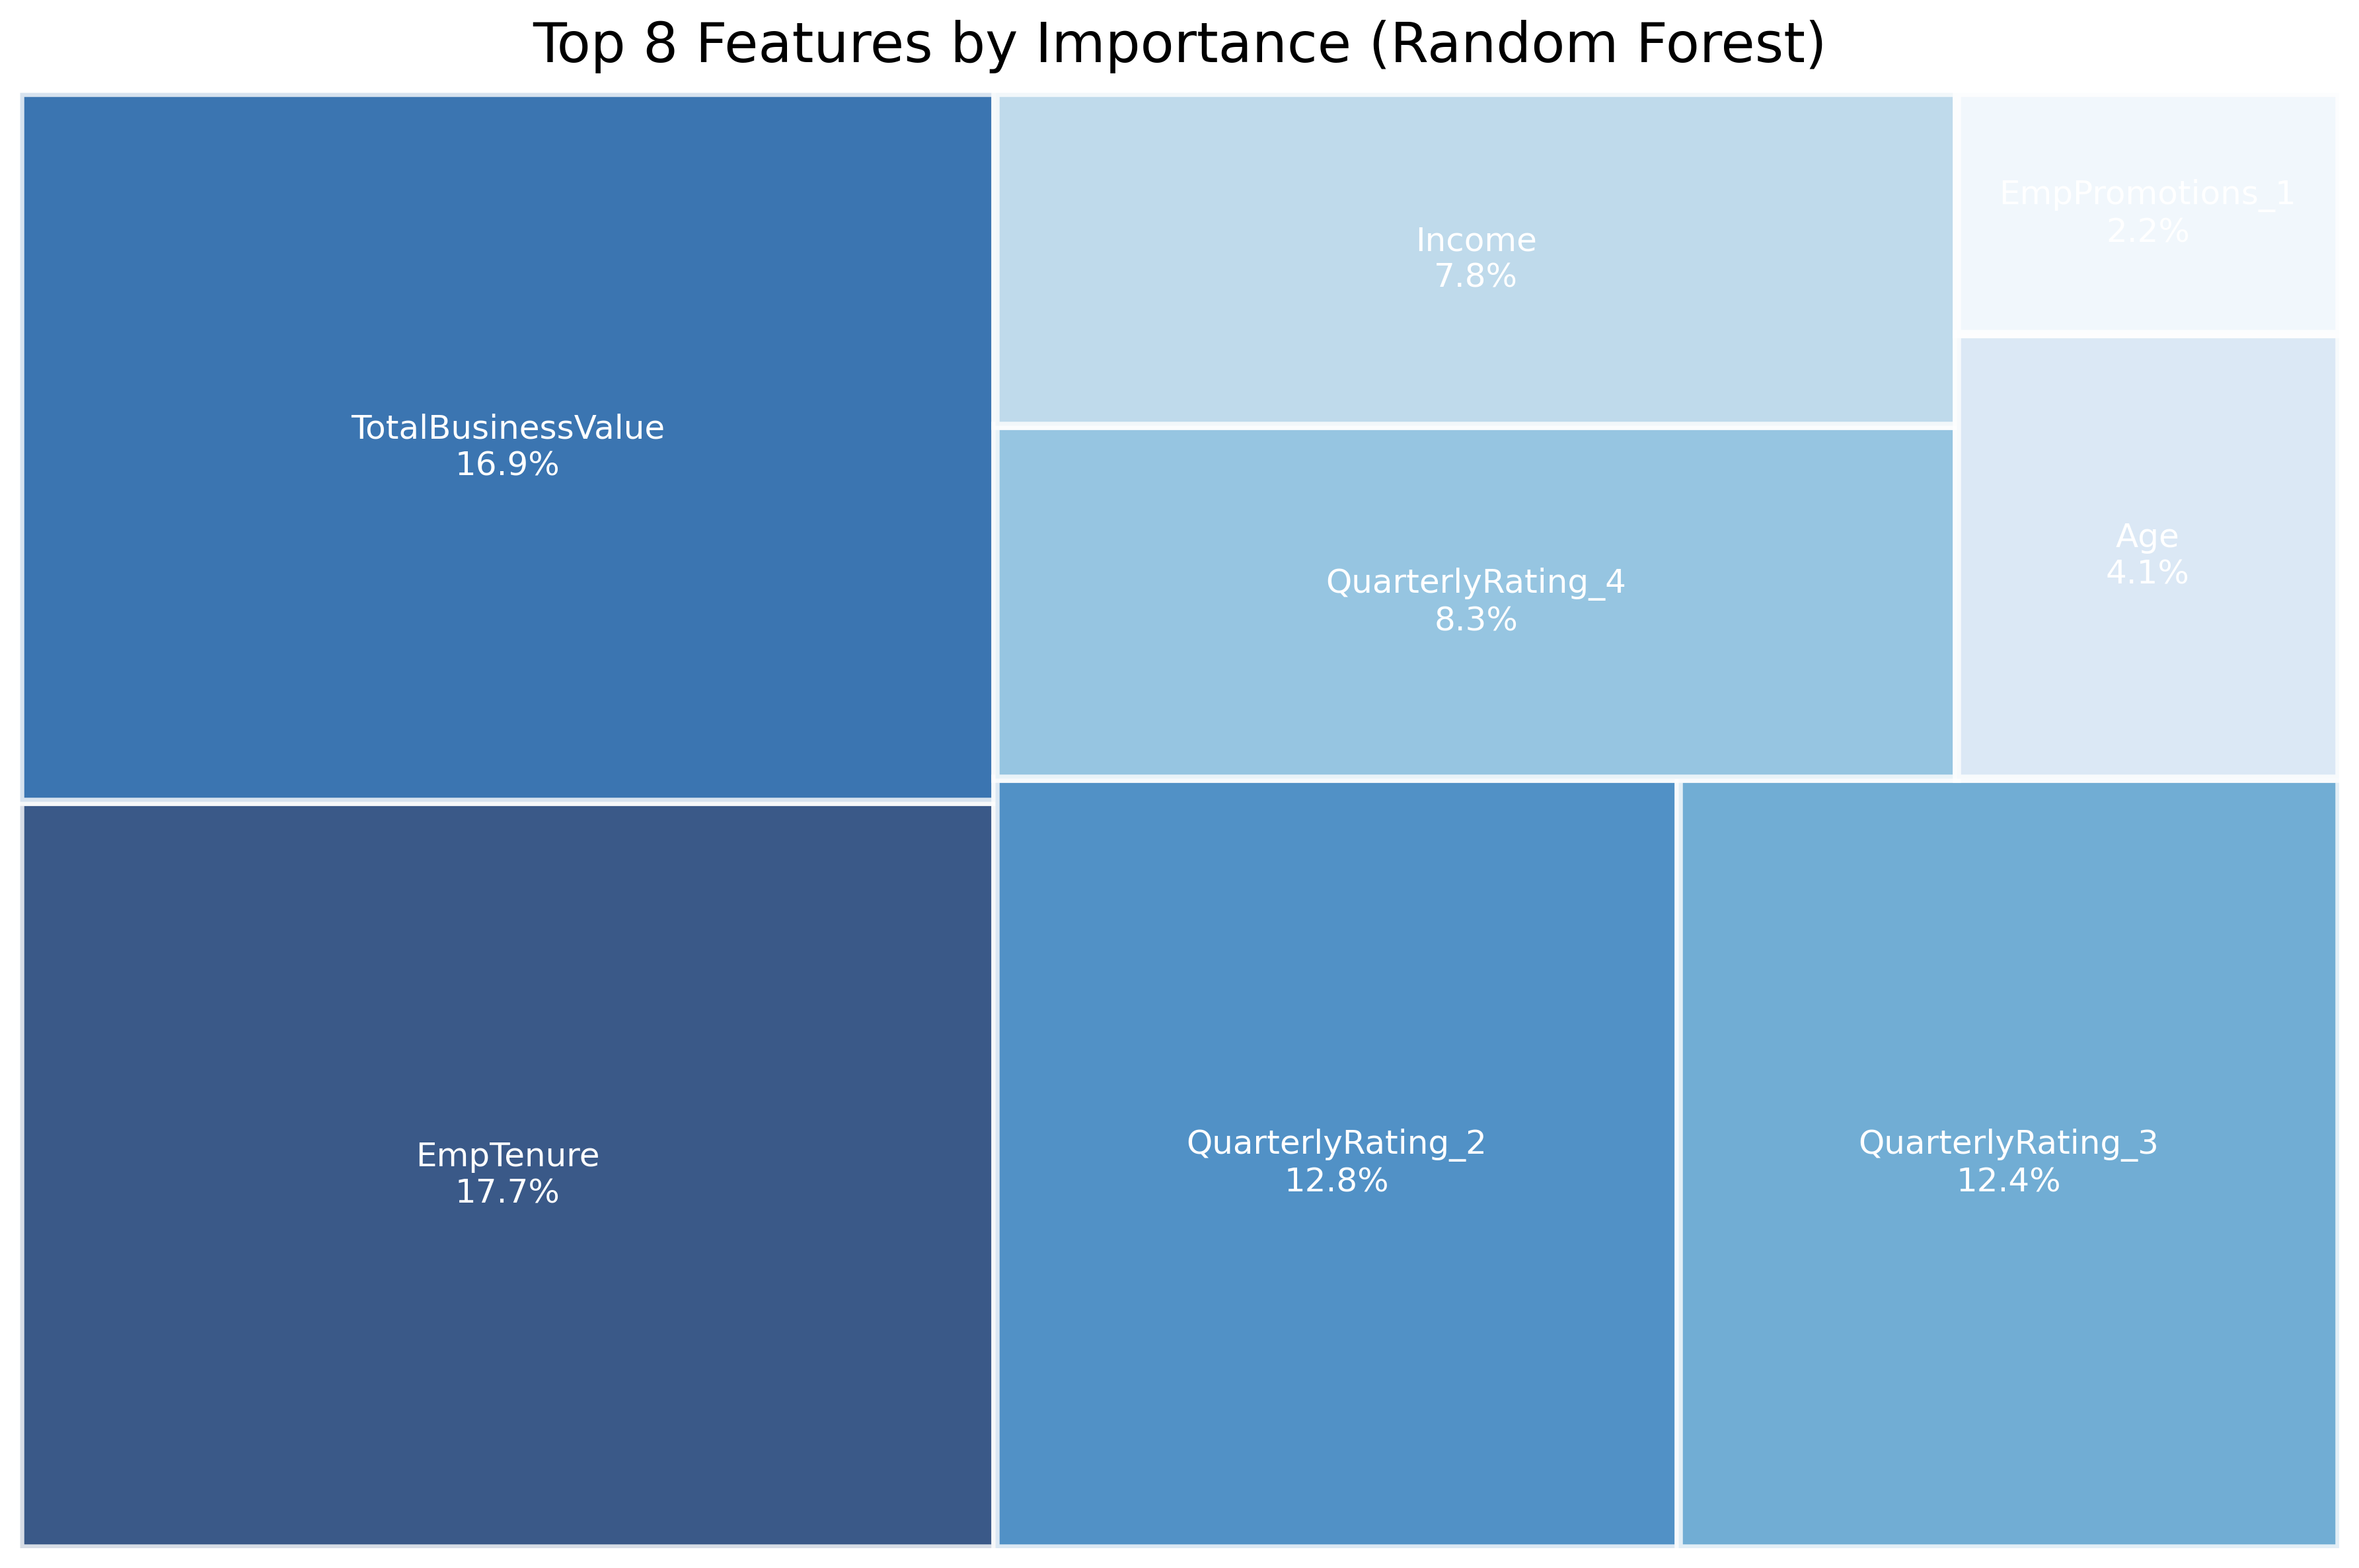

In [99]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 8, 16],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 8, 10],
    'class_weight':['balanced', None], 
}
rf_classifier = RandomForestClassifier(random_state=42)

# RandomizedSearch Cross Validation
search = RandomizedSearchCV(rf_classifier, param_grid, n_iter=20, cv=5, 
                           scoring='roc_auc', random_state=42)
search.fit(X_train_balanced, y_train_balanced)

best_params = search.best_params_
print("Best parameters:", best_params)
best_score = round(search.best_score_, 4)
print("Best cross-validation score:", best_score)

best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_balanced, y_train_balanced)

rf_val_pred  = best_rf_model.predict(X_val_processed)
rf_val_proba = best_rf_model.predict_proba(X_val_processed)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, rf_val_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, rf_val_proba):.4f}")

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10))

plot = []
plot.append(plot_learning_curves(train_sizes, train_scores, test_scores, model_name='Random Forest'))

features = X_train_balanced.columns.tolist()
importances = best_rf_model.feature_importances_
plot_feature_importance_treemap(features, importances, 'Random Forest')

## **AdaBoost**

Best parameters: {'n_estimators': 300, 'learning_rate': 1.0}
Best cross-validation score: 0.8829

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       124
           1       0.86      0.82      0.84       323

    accuracy                           0.77       447
   macro avg       0.72      0.73      0.72       447
weighted avg       0.78      0.77      0.77       447

ROC-AUC Score: 0.8206


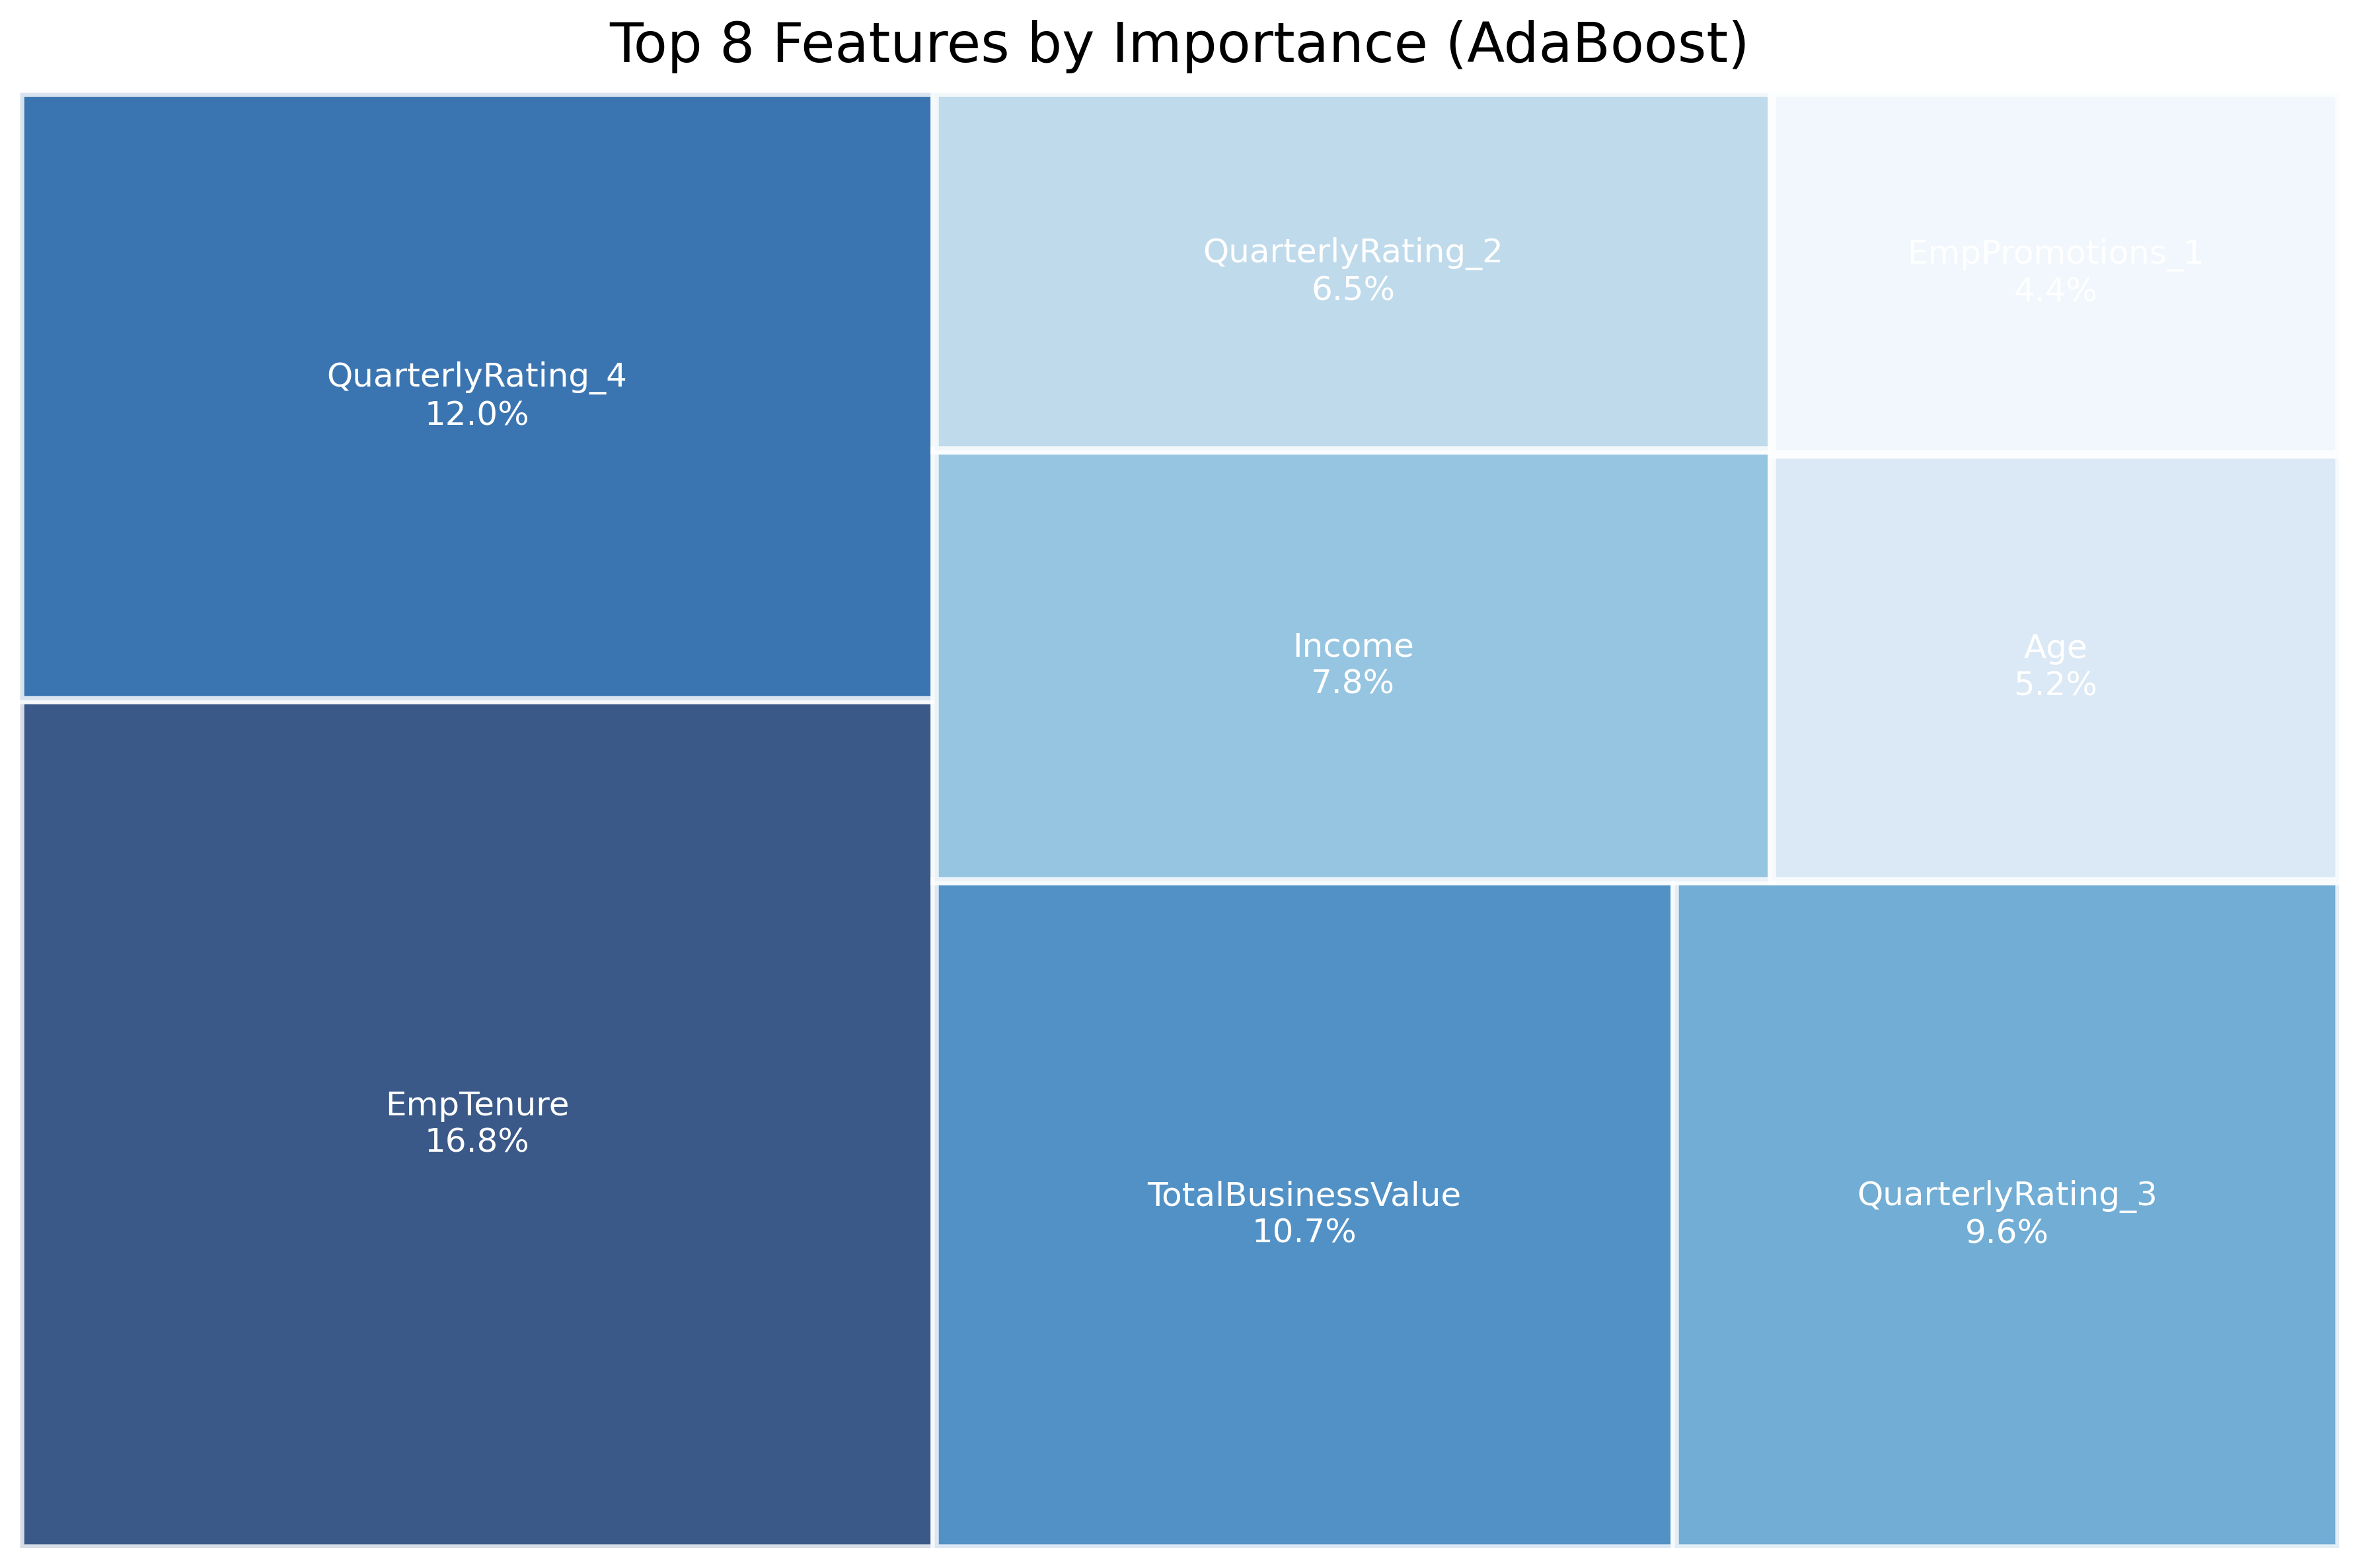

In [100]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
}

ada_classifier = AdaBoostClassifier(random_state=42)

search = RandomizedSearchCV(ada_classifier, param_grid, n_iter=20, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
search.fit(X_train_balanced, y_train_balanced)

best_params = search.best_params_
print("Best parameters:", best_params)
best_score = round(search.best_score_, 4)
print("Best cross-validation score:", best_score)

best_ada_model = AdaBoostClassifier(**best_params, random_state=42)
best_ada_model.fit(X_train_balanced, y_train_balanced)

ada_val_pred = best_ada_model.predict(X_val_processed)
ada_val_proba = best_ada_model.predict_proba(X_val_processed)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, ada_val_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, ada_val_proba):.4f}")

# Generate learning curves to check for overfitting
train_sizes, train_scores, test_scores = learning_curve(
    best_ada_model, X_train_balanced, y_train_balanced, 
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plot.append(plot_learning_curves(train_sizes, train_scores, test_scores, model_name='AdaBoost'))

features = X_train_balanced.columns.tolist()
importances = best_ada_model.feature_importances_
plot_feature_importance_treemap(features, importances, 'AdaBoost')

## **Gradient Boosting**

Best parameters: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.05}
Best cross-validation score: 0.9111

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       124
           1       0.86      0.83      0.85       323

    accuracy                           0.78       447
   macro avg       0.73      0.74      0.73       447
weighted avg       0.79      0.78      0.78       447

ROC-AUC Score: 0.8274


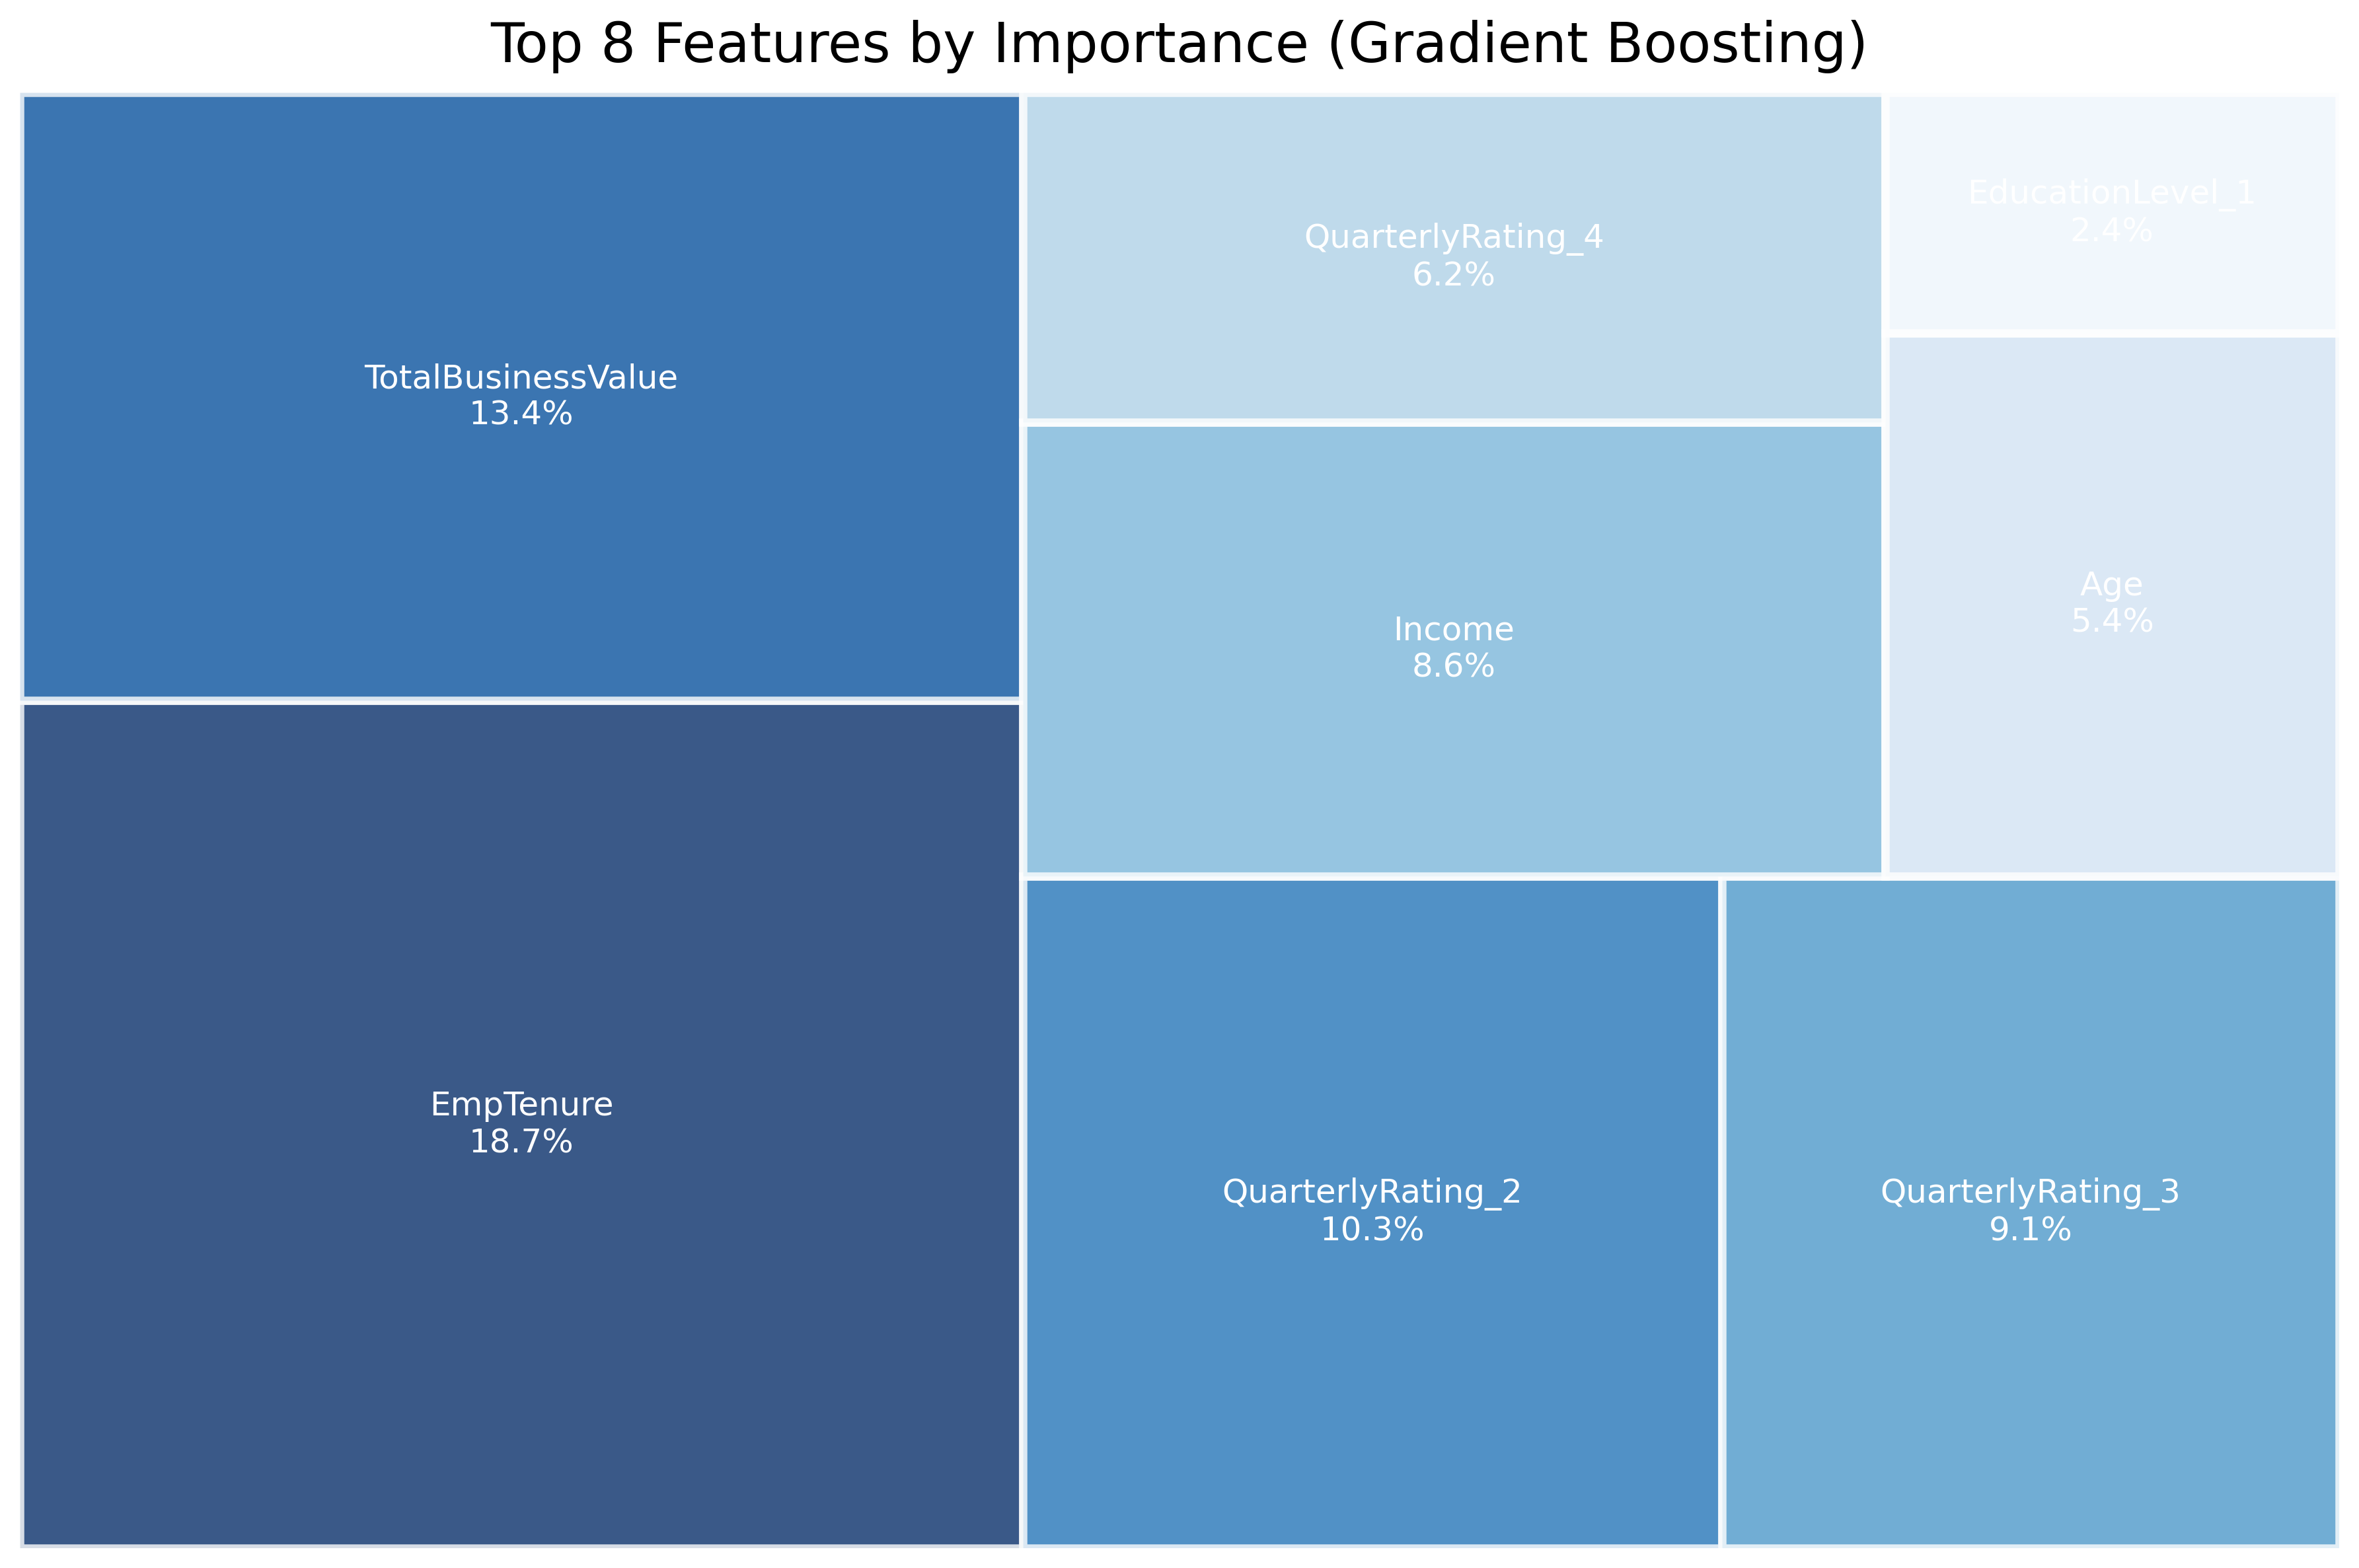

In [101]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.03, 0.05],  # Lower learning rates
    'max_depth': [2, 3, 4],               # Much shallower trees
    'min_samples_split': [5, 10, 20],     # Require more samples to split
    'min_samples_leaf': [5, 10, 15],      # Require more samples in leaves
    'subsample': [0.6, 0.7, 0.8],         # More aggressive subsampling
    'max_features': ['sqrt', 'log2']       # Limit features considered at each split
}

gb_classifier = GradientBoostingClassifier(random_state=42)

search = RandomizedSearchCV(gb_classifier, param_grid, n_iter=20, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
search.fit(X_train_balanced, y_train_balanced)

best_params = search.best_params_
print("Best parameters:", best_params)
best_score = round(search.best_score_, 4)
print("Best cross-validation score:", best_score)

best_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_model.fit(X_train_balanced, y_train_balanced)

gb_val_pred = best_gb_model.predict(X_val_processed)
gb_val_proba = best_gb_model.predict_proba(X_val_processed)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, gb_val_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, gb_val_proba):.4f}")

train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X_train_balanced, y_train_balanced, 
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plot.append(plot_learning_curves(train_sizes, train_scores, test_scores, model_name='Gradient Boosting'))

features = X_train_balanced.columns.tolist()
importances = best_gb_model.feature_importances_
plot_feature_importance_treemap(features, importances, 'Gradient Boosting')

## **XGBoost**

Best parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 2, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best cross-validation score: 0.8796

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       124
           1       0.87      0.82      0.84       323

    accuracy                           0.78       447
   macro avg       0.73      0.74      0.73       447
weighted avg       0.79      0.78      0.78       447

ROC-AUC Score: 0.8126


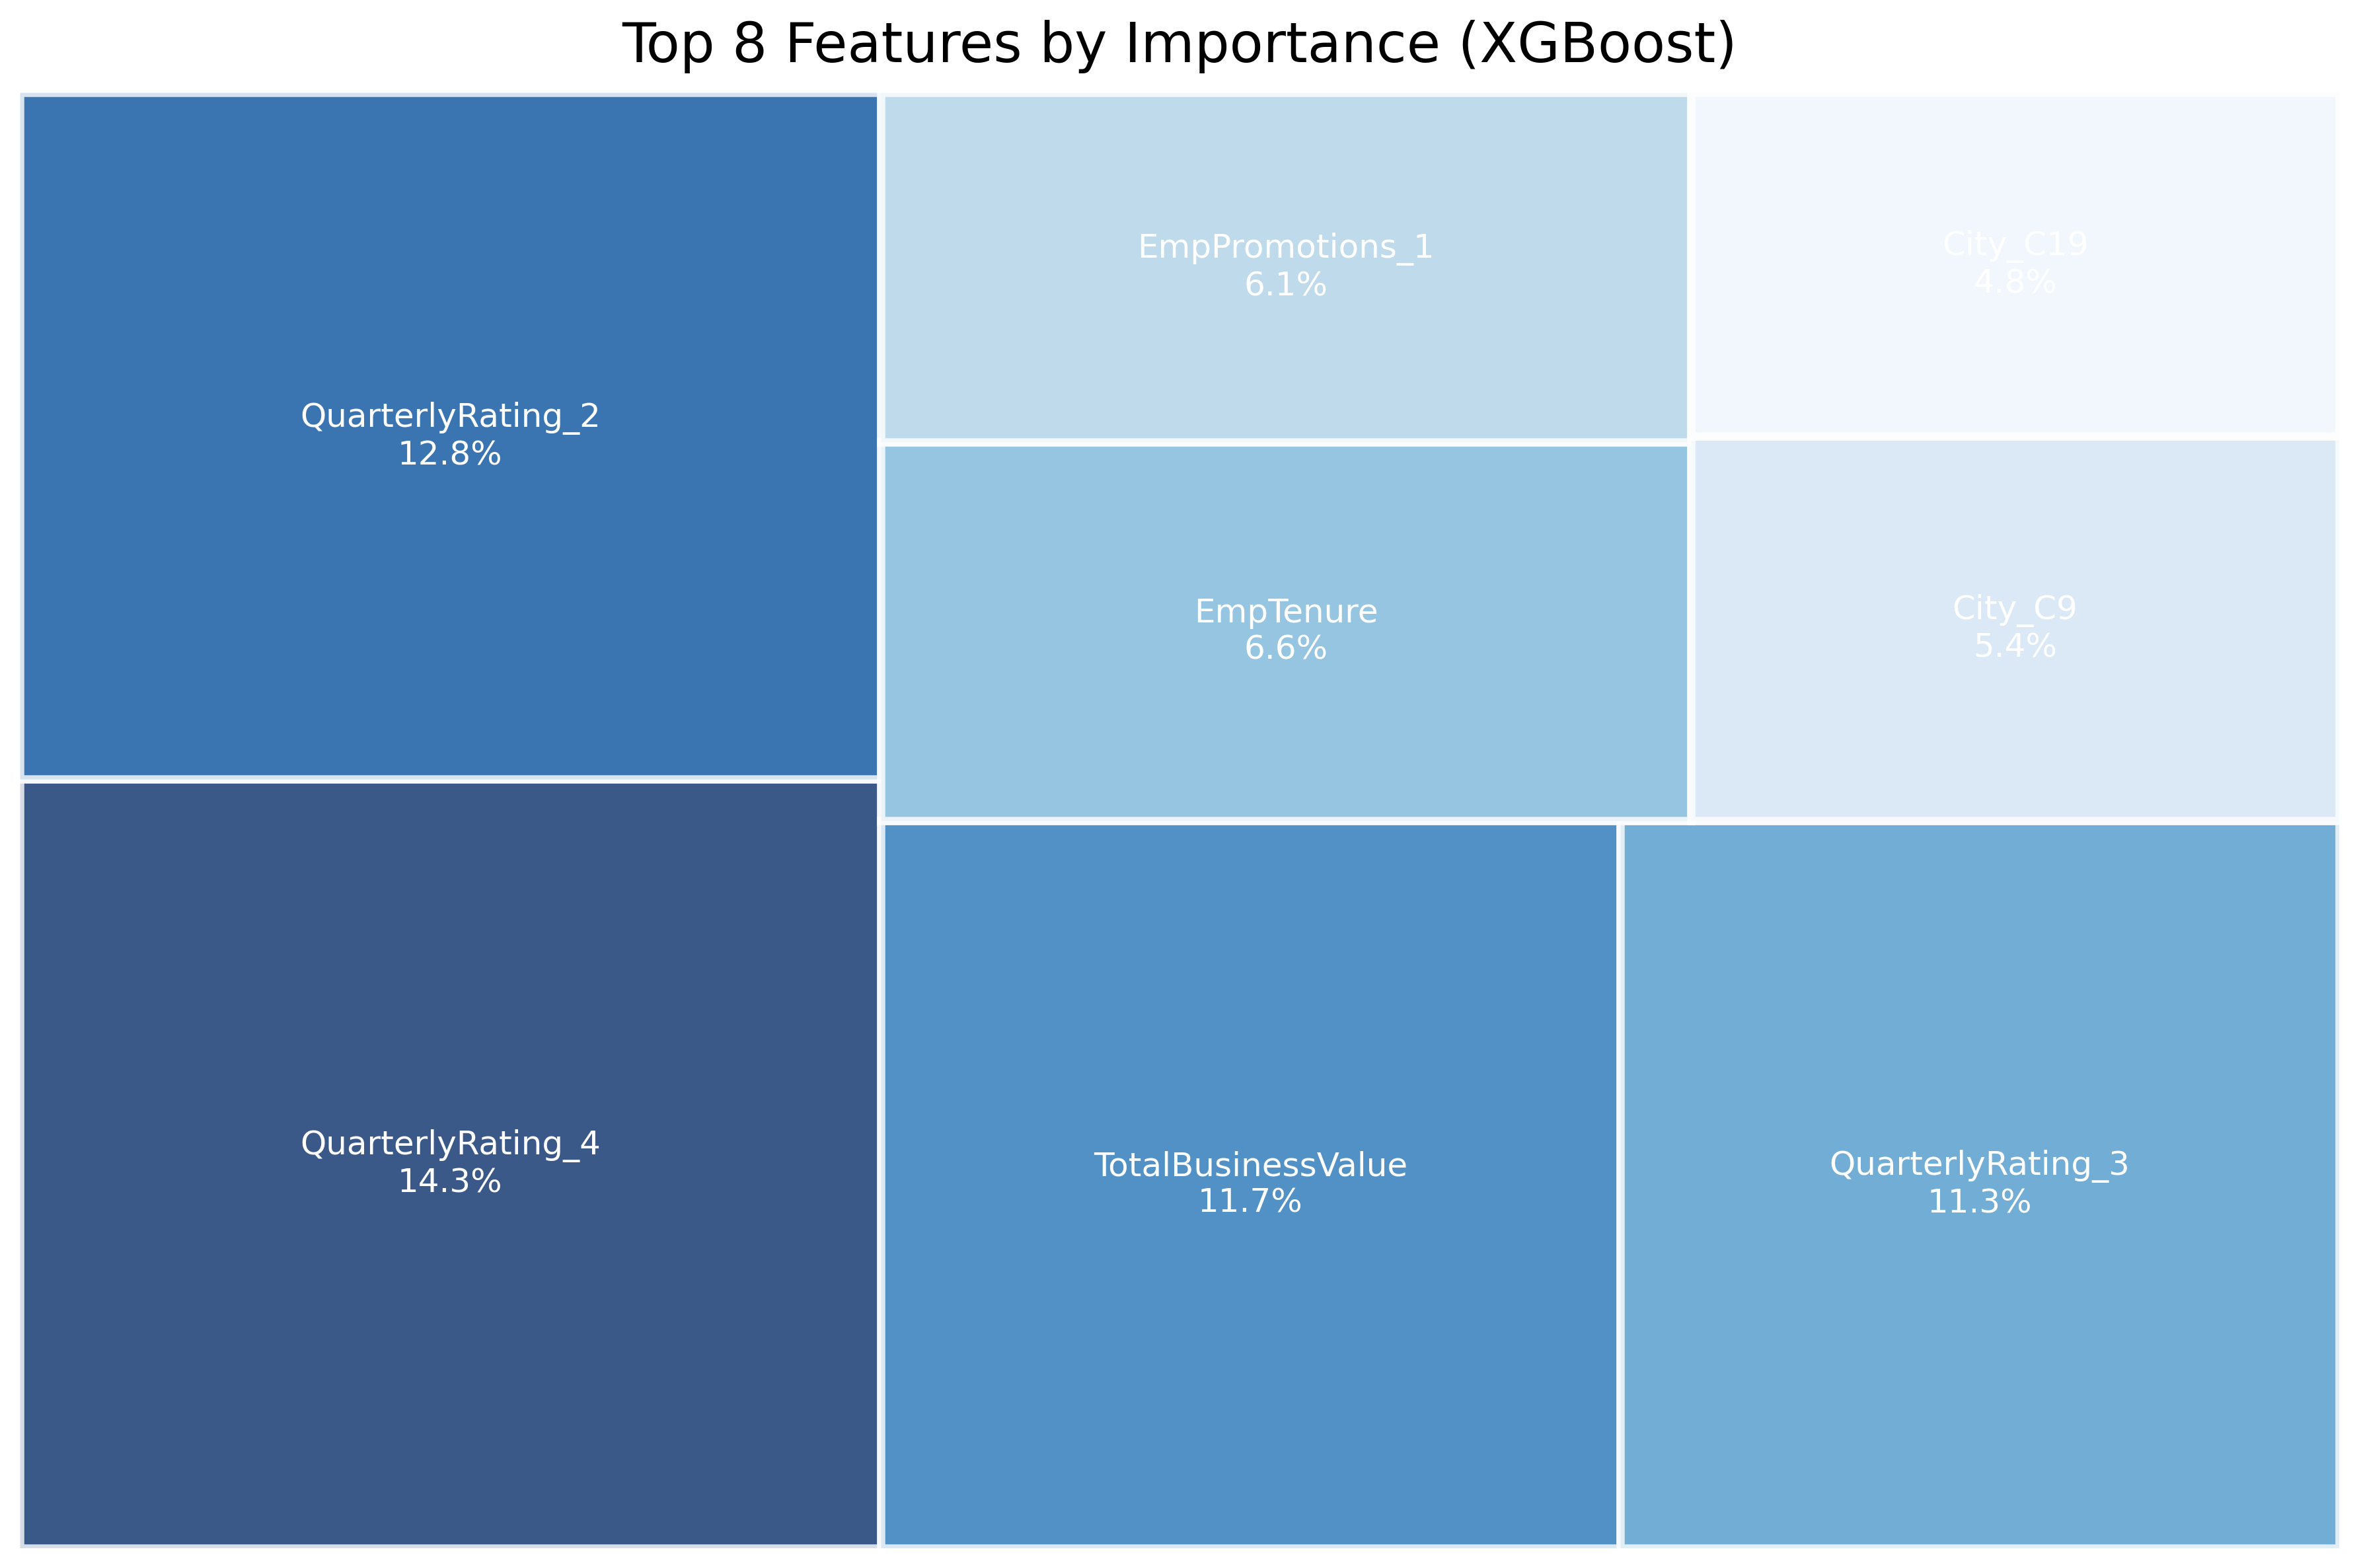

In [102]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],              # Shallower trees
    'learning_rate': [0.01, 0.03, 0.05], # Lower learning rates
    'subsample': [0.5, 0.6, 0.7],        # More aggressive subsampling
    'colsample_bytree': [0.5, 0.6, 0.7], # More aggressive feature sampling
    'min_child_weight': [5, 7, 10],      # Require more observations per node
    'gamma': [0.1, 0.3, 0.5],            # Higher minimum loss reduction required
    'reg_alpha': [0.1, 1, 10],           # L1 regularization
    'reg_lambda': [1, 10, 100]           # L2 regularization
}

xgb_classifier = xgb.XGBClassifier(random_state=42)

search = RandomizedSearchCV(xgb_classifier, param_grid, n_iter=20, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
search.fit(X_train_balanced, y_train_balanced)

best_params = search.best_params_
print("Best parameters:", best_params)
best_score = round(search.best_score_, 4)
print("Best cross-validation score:", best_score)

best_xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train_balanced, y_train_balanced)

xgb_val_pred = best_xgb_model.predict(X_val_processed)
xgb_val_proba = best_xgb_model.predict_proba(X_val_processed)[:, 1]

print("\nValidation Set Performance:")
print(classification_report(y_val, xgb_val_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_val, xgb_val_proba):.4f}")

train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, X_train_balanced, y_train_balanced, 
    cv=5, scoring='roc_auc',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plot.append(plot_learning_curves(train_sizes, train_scores, test_scores, model_name='XGBoost'))

features = X_train_balanced.columns.tolist()
importances = best_xgb_model.feature_importances_
plot_feature_importance_treemap(features, importances, 'XGBoost')

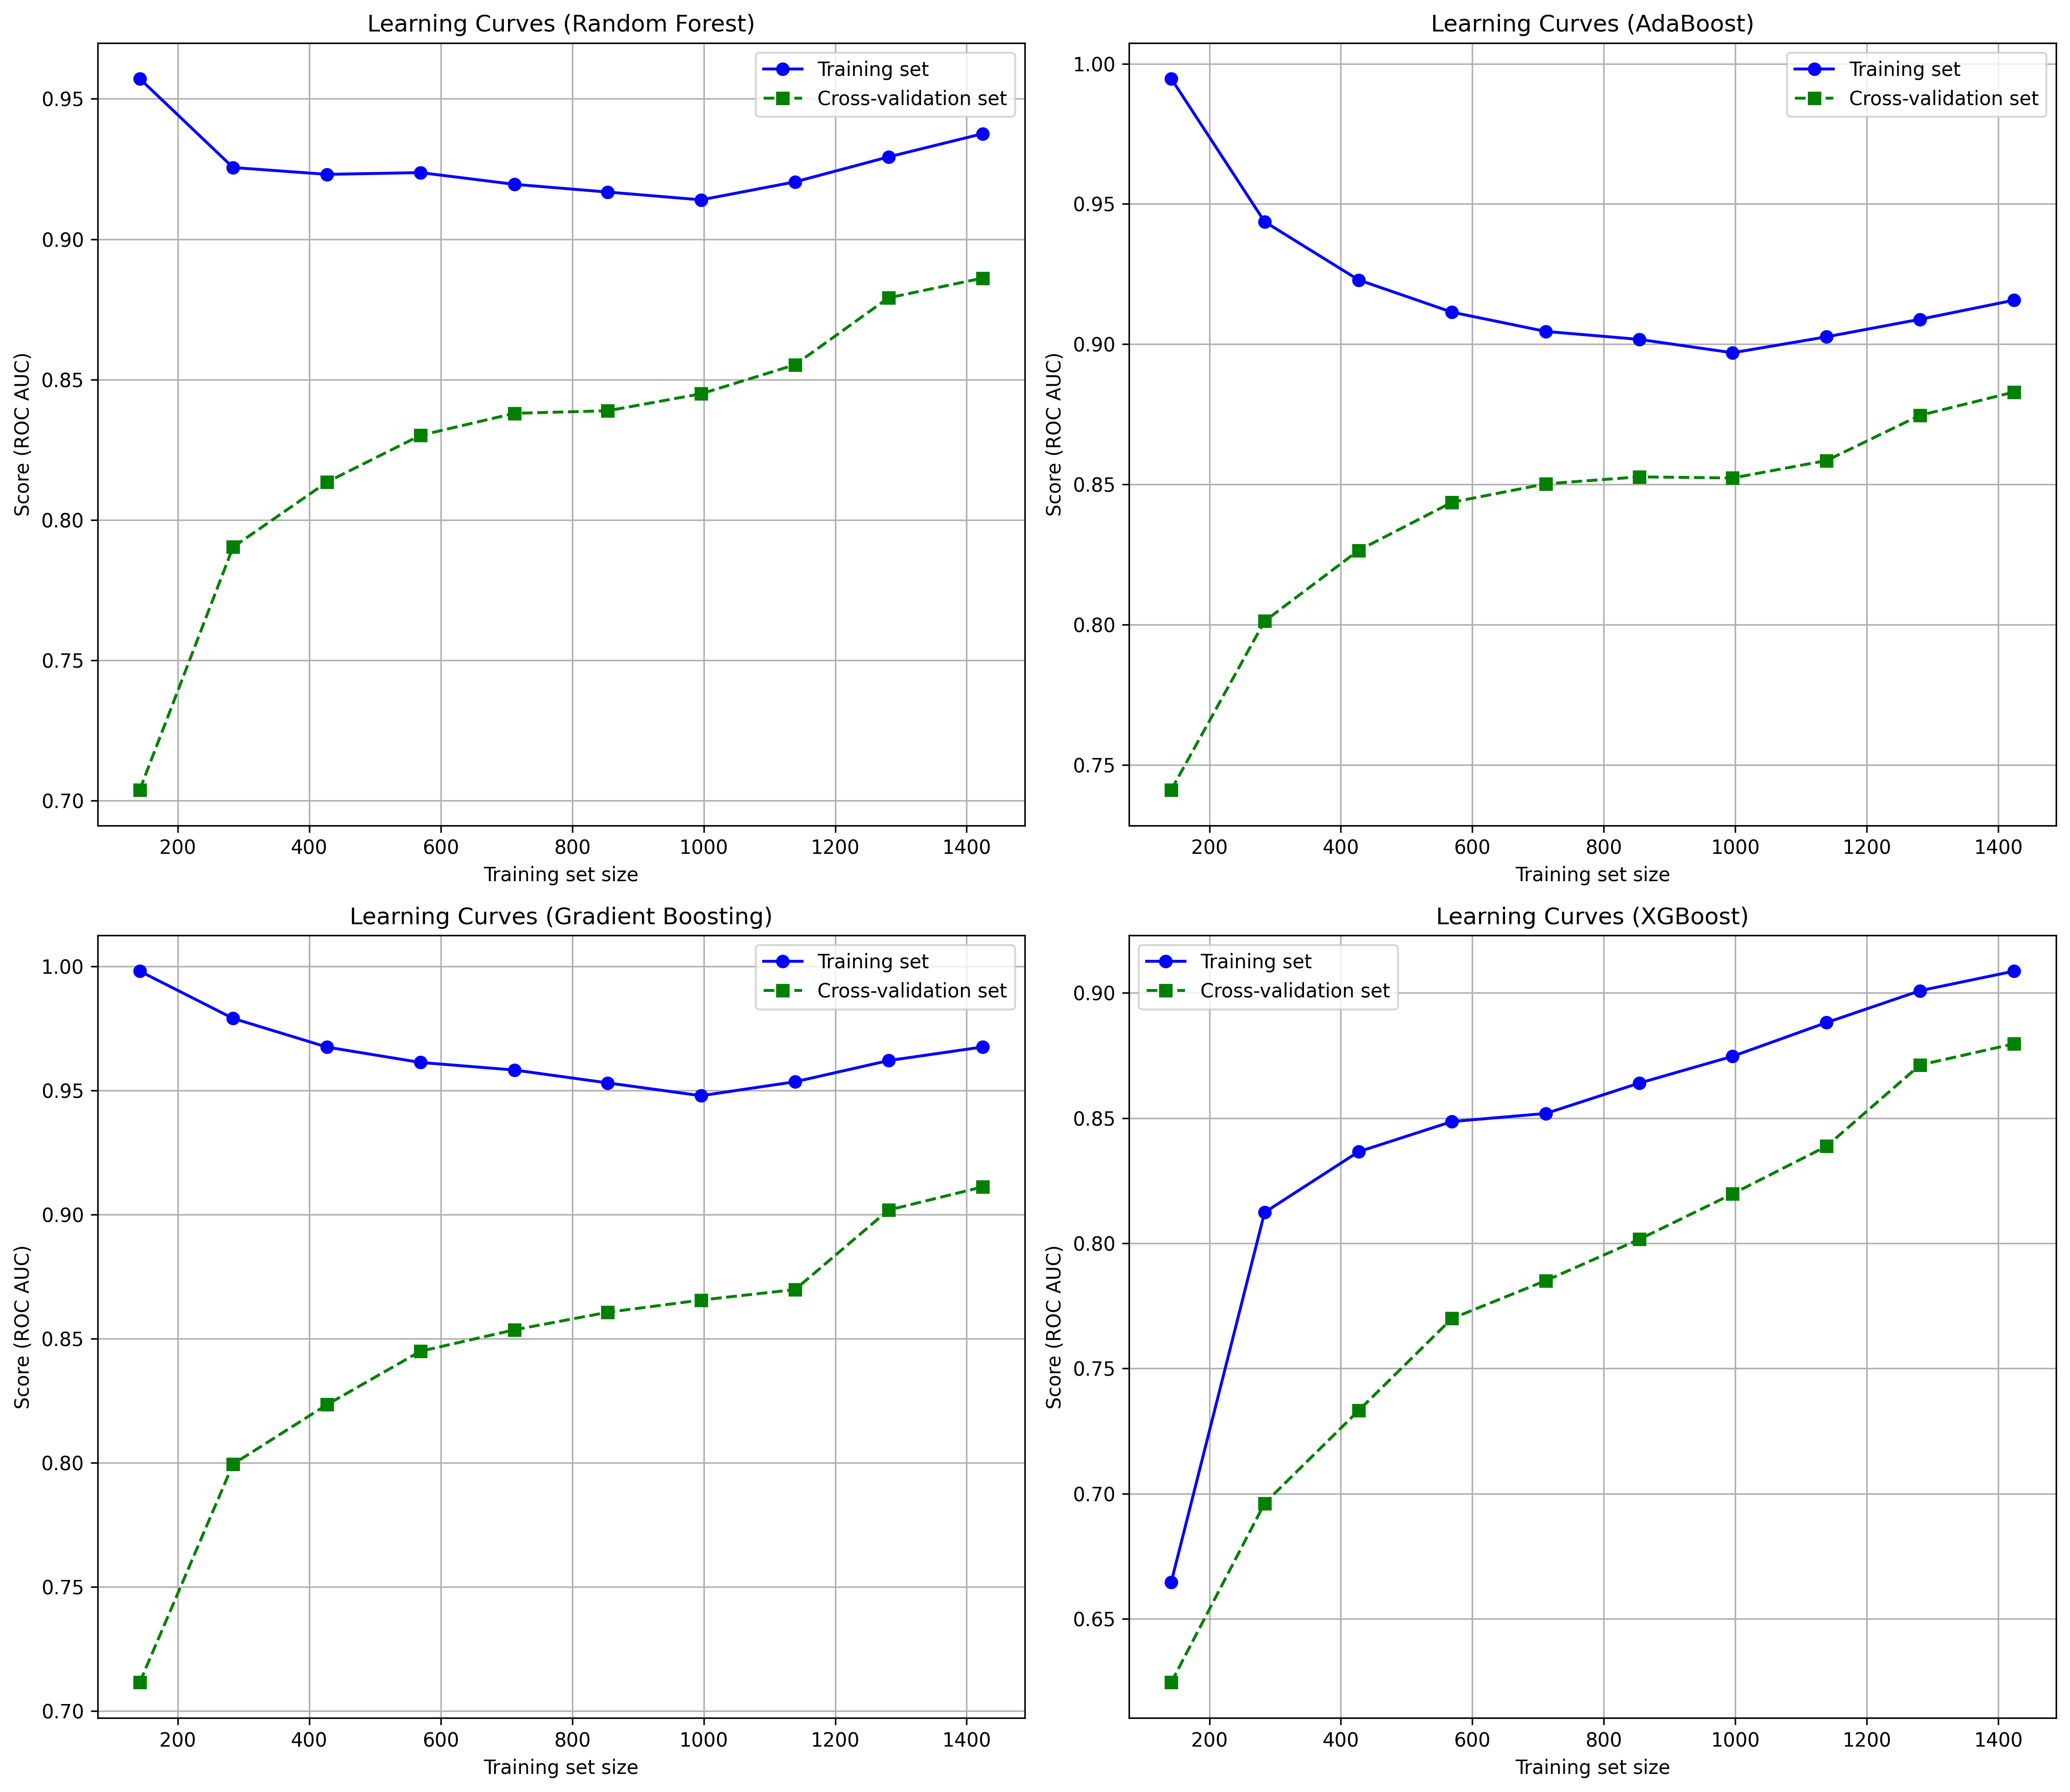

In [103]:
from matplotlib.axes import Axes

fig, axes = plt.subplots(2, 2, figsize=(15, 13), dpi=300)
axes = axes.flatten()

for i, model_fig in enumerate(plot):
    if i >= 4:
        break
    
    for item in model_fig.get_children():
        if isinstance(item, Axes):
            for line in item.get_lines():
                axes[i].plot(line.get_xdata(), line.get_ydata(), 
                           color=line.get_color(), 
                           linestyle=line.get_linestyle(),
                           marker=line.get_marker(),
                           label=line.get_label())
            
            axes[i].set_title(item.get_title())
            axes[i].set_xlabel(item.get_xlabel())
            axes[i].set_ylabel(item.get_ylabel())
            axes[i].legend()
            axes[i].grid(True)

plt.tight_layout()
plt.show()

### Each model is a learning journey!
*(Generated using Claude 3.7 Sonnet)*

#### *Random Forest: "The Reliable Veteran"*

- **Random Forest** begins its journey with exceptional confidence, scoring an impressive 95% on the training data. As it encounters more drivers in its training, it maintains a steady performance around 91-92%, showing remarkable consistency. Meanwhile, its ability to generalize to new drivers (the cross-validation line) shows steady improvement from a modest 73% to a respectable 89%.

- This is the story of a reliable veteran - starting strong and maintaining consistency while gradually improving its ability to predict churn for drivers it hasn't seen before. The narrowing gap between the blue and green lines tells us that Random Forest is becoming more trustworthy with experience, balancing what it knows with what it can predict.

#### *AdaBoost: "The Balanced Learner"*

- **AdaBoost** begins with near-perfect knowledge of its training data at 99%, but quickly realizes it needs to temper its confidence to better understand the bigger picture. We see it deliberately adjusting its approach as it processes more driver data, finding a sweet spot around 90% on training data.

- Meanwhile, its predictive abilities on new drivers steadily climb from 74% to 88%. This model shows the most balanced learning journey - it's willing to sacrifice some of its initial confidence to gain better real-world performance. By the end, the relatively narrow gap between training and validation performance shows AdaBoost has achieved a healthy balance between memorization and generalization.

#### *Gradient Boosting: "The Perfectionist"*

- **Gradient Boosting** starts with nearly perfect 99% accuracy on its training data and remains reluctant to let go of this perfection, maintaining above 95% throughout its learning journey. This is our perfectionist - it insists on mastering every detail in the training data.

- Its ability to predict churn for new drivers improves steadily from a modest 71% to an impressive 91%. While it maintains a wider gap between what it knows and what it can predict (compared to AdaBoost), this perfectionist approach ultimately achieves excellent generalization by the end of its journey, rivaling Random Forest in its ability to predict churn for new drivers.

#### *XGBoost: "The Rapid Learner"*

- **XGBoost** tells the most dramatic story of all. It begins with the lowest training performance at just 67%, but experiences a remarkable growth spurt between 200 and 400 training examples, rapidly climbing to 84%. From there, it continues a steady upward trajectory, eventually achieving the highest final performance on new drivers at 88%.

- This is our rapid learner - starting with humility but quickly absorbing patterns from the data. The consistent upward trend in both lines shows XGBoost is continuously improving as it sees more data, suggesting it might perform even better with additional training examples. The narrowing gap between training and validation performance indicates it's learning to generalize effectively rather than just memorizing.

#### *The Business Story*

For Ola's business leaders, these learning curves reveal that all four models eventually become strong predictors of driver churn, but they take different paths to get there:

- **Random Forest** offers reliability and consistency

- **AdaBoost** provides the most balanced approach

- **Gradient Boosting** maintains perfectionism while still generalizing well

- **XGBoost** demonstrates remarkable growth and adaptability

The good news is that all models achieve validation scores above 88% by the end, suggesting Ola can reliably predict which drivers are at risk of churning, enabling targeted retention strategies that could significantly impact the bottom line.

## **Voting Ensemble**

Test Set Performance:

              precision    recall  f1-score   support

           0       0.78      0.66      0.72       193
           1       0.85      0.91      0.88       403

    accuracy                           0.83       596
   macro avg       0.82      0.79      0.80       596
weighted avg       0.83      0.83      0.83       596

ROC-AUC Score: 0.8508


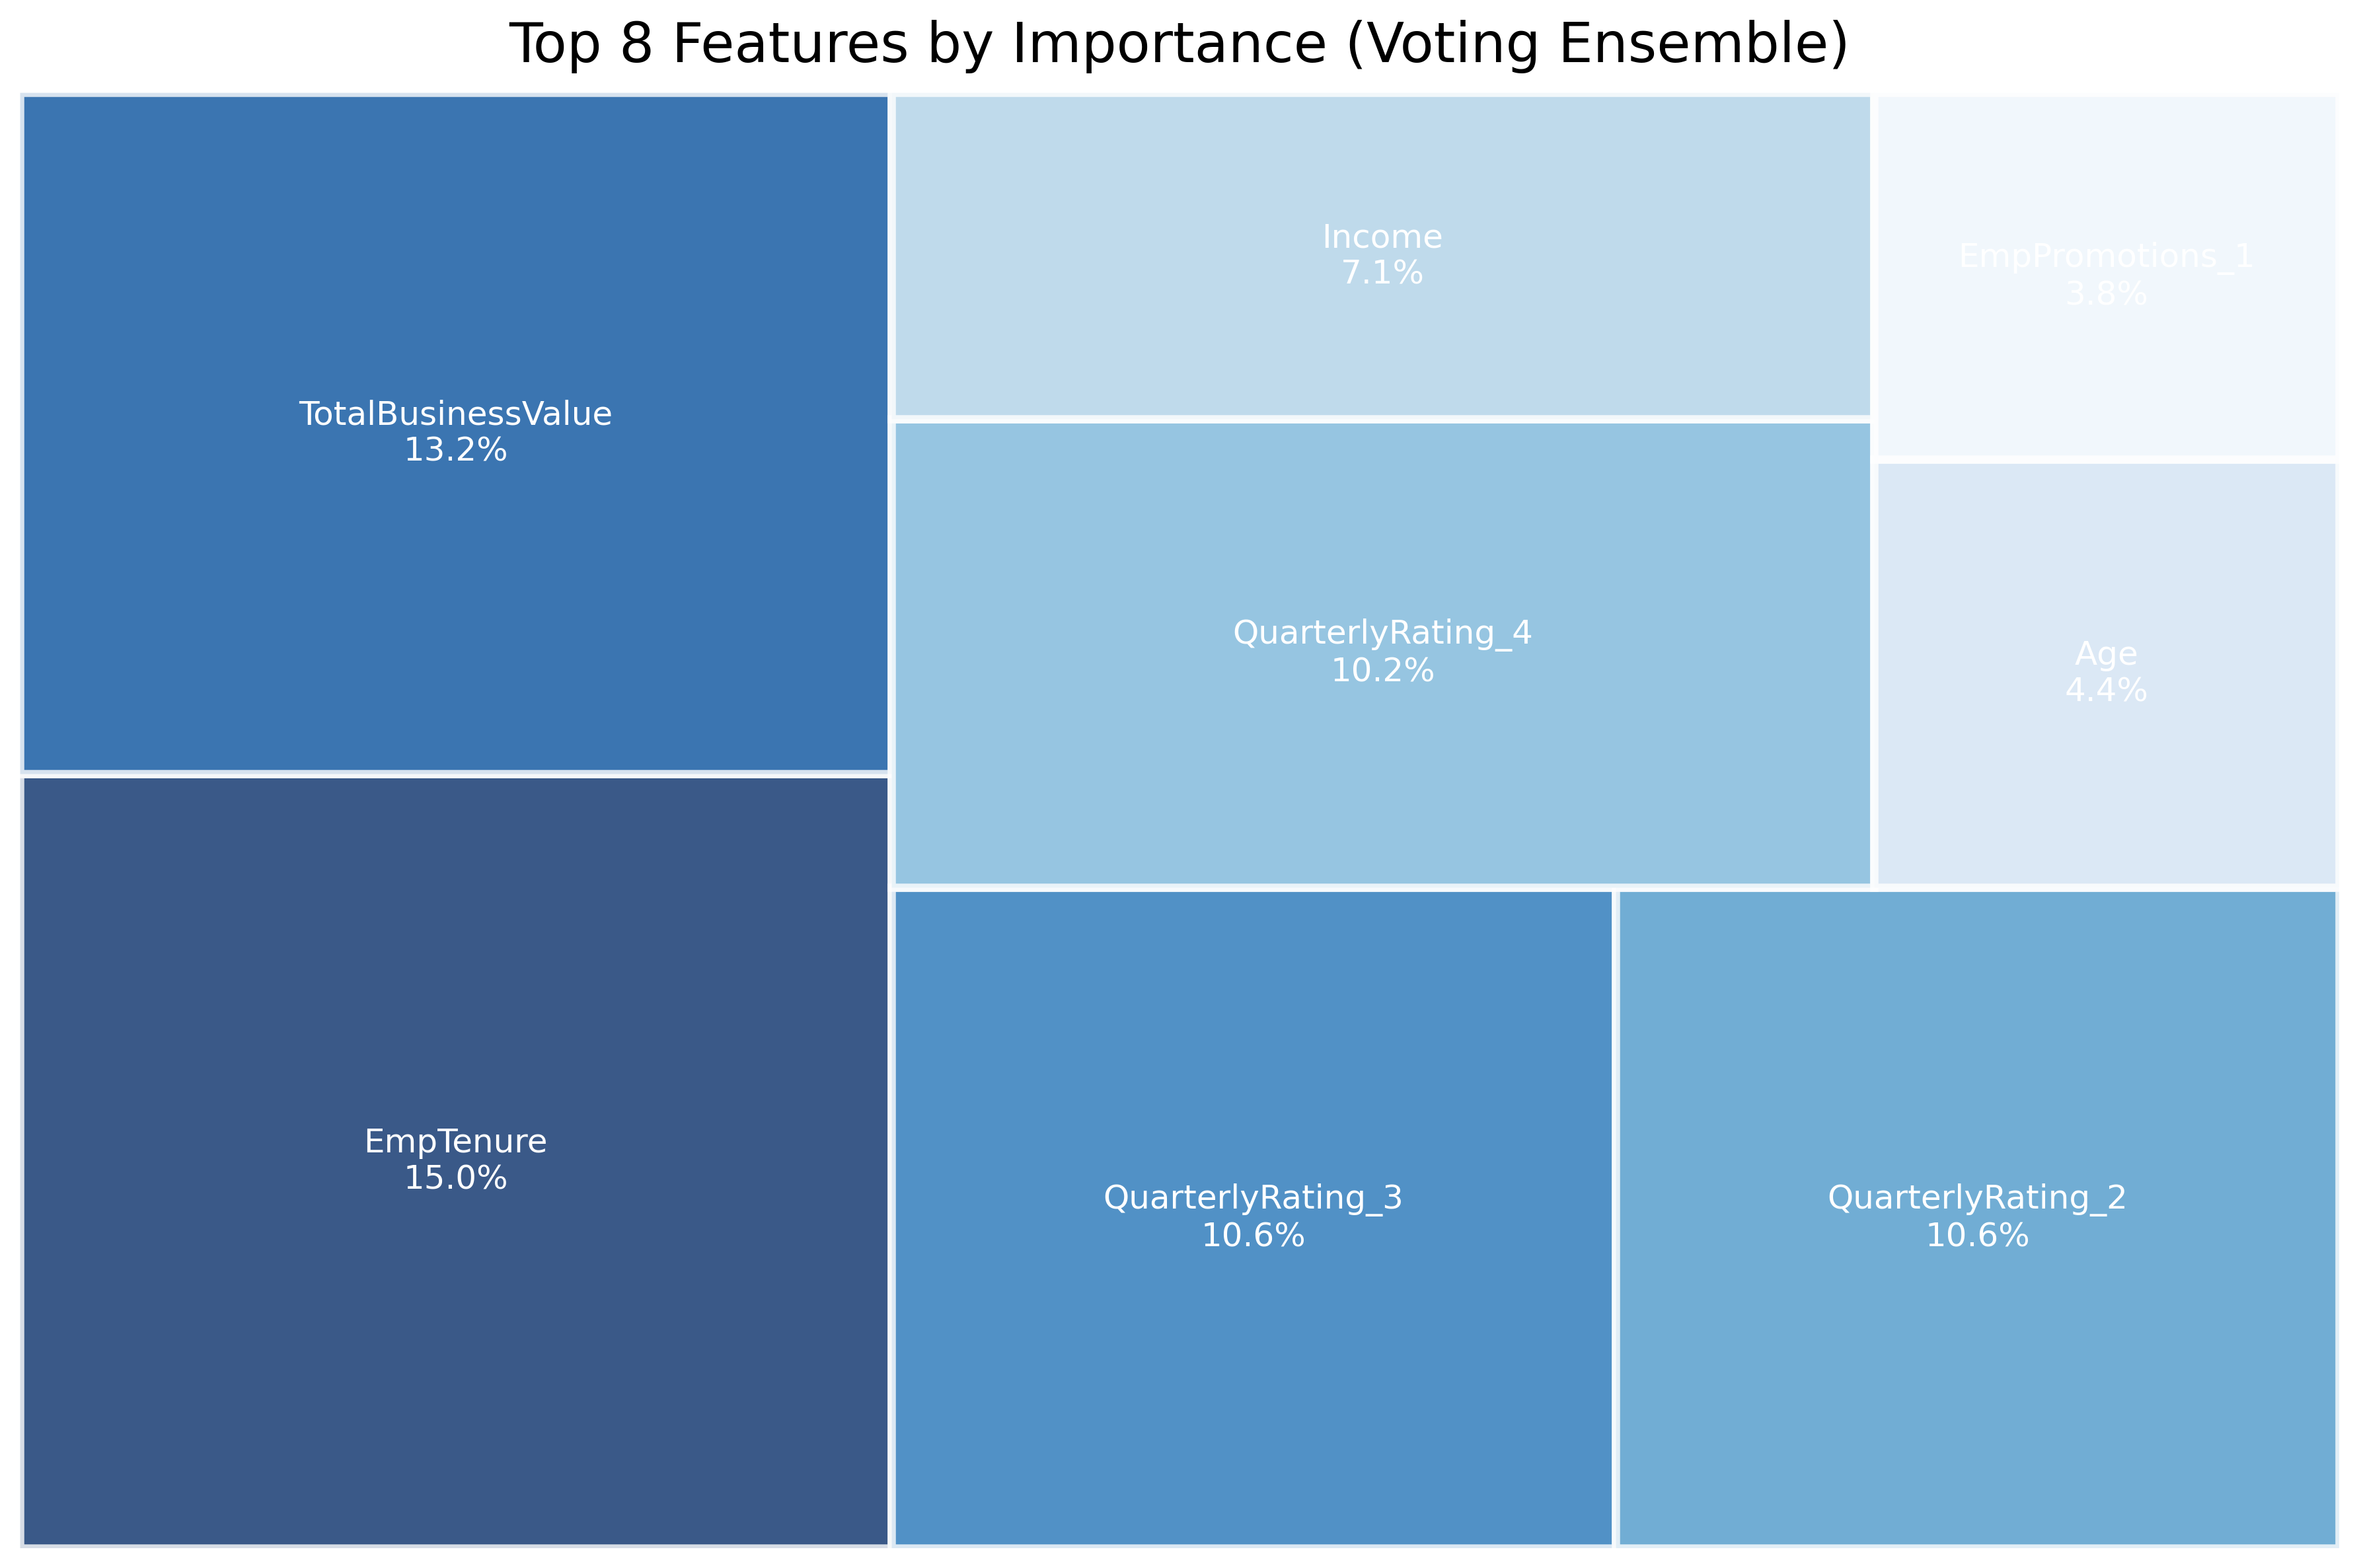

In [104]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('ada', best_ada_model),
        ('gb', best_gb_model),
        ('xgb', best_xgb_model)
    ],
    voting='soft'  # Use predicted probabilities
)

# Fit on training data, evaluate on test set
voting_clf.fit(X_train_balanced, y_train_balanced)
y_test_pred = voting_clf.predict(X_test_processed)
y_test_proba = voting_clf.predict_proba(X_test_processed)[:, 1]

print("Test Set Performance:\n")
print(classification_report(y_test, y_test_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")

features = X_train_balanced.columns.tolist()
estimators = voting_clf.named_estimators_
importances = np.zeros(len(feature_names))
for name, model in estimators.items():
    importances += model.feature_importances_
importances /= len(estimators)

# for use in final features and model selection phase
voting_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

plot_feature_importance_treemap(features, importances, 'Voting Ensemble')

# 7. 'Best' Model and Final Feature Selection 

In [105]:
# Compare all models on Validation Set
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

models = {
    'Random Forest': best_rf_model,
    'AdaBoost': best_ada_model,
    'Gradient Boosting': best_gb_model,
    'XGBoost': best_xgb_model,
    'Voting Ensemble': voting_clf
}

val_results = []
for name, model in models.items():
    val_pred = model.predict(X_val_processed)
    val_proba = model.predict_proba(X_val_processed)[:, 1]
    val_auc = roc_auc_score(y_val, val_proba)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_precision = precision_score(y_val, val_pred)
    val_recall = recall_score(y_val, val_pred)
    val_f1 = f1_score(y_val, val_pred)

    val_results.append({
        'Model': name,
        'ROC-AUC': val_auc,
        'Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1 Score': val_f1
    })

val_results_df = pd.DataFrame(val_results).set_index('Model')
val_results_df = val_results_df.round(4).sort_values(by=['F1 Score'], ascending=False)
print("Best Model Performance on Validation Set:")

best_model_name = val_results_df.index[0]
best_model = models[best_model_name]
print(f"{best_model_name.upper()} (based on F1 Score)")

# Evaluate model performance on Test Set
test_pred = best_model.predict(X_test_processed)
test_proba = best_model.predict_proba(X_test_processed)[:, 1]
test_auc = roc_auc_score(y_test, test_proba)

test_results = []
for name, model in models.items():
    test_pred = model.predict(X_test_processed)
    test_proba = model.predict_proba(X_test_processed)[:, 1]
    test_auc = roc_auc_score(y_test, test_proba)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)

    test_results.append({
        'Model': name,
        'ROC-AUC': test_auc,
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1 Score': test_f1
    })

test_results_df = pd.DataFrame(test_results).set_index('Model')

Best Model Performance on Validation Set:
VOTING ENSEMBLE (based on F1 Score)


In [107]:
from IPython.display import Markdown, display

def eval_performance(performance_gap):
    if performance_gap < -5.0:
        eval = "⚠️ Model underperforms on test set. Possible overfitting."
    elif performance_gap > 5.0:
        eval = "⚠️ Model performs unusually well on test set. Check for data leakage."
    else:
        eval = "✅ Model generalizes well: Test performance is consistent with validation."
    return eval

results_df = val_results_df.join(test_results_df, how='inner', lsuffix='_val', rsuffix='_test')
results_df = results_df[['F1 Score_val', 'ROC-AUC_val', 'ROC-AUC_test']]
results_df['Performance_Gap'] = results_df['ROC-AUC_test'] - results_df['ROC-AUC_val']

for col in ['F1 Score_val', 'ROC-AUC_val', 'ROC-AUC_test', 'Performance_Gap']:
    results_df[col] = results_df[col].map(lambda x: f"{x*100:.2f}%" if pd.notnull(x) else "")

results_df['Performance_Evaluation'] = results_df['Performance_Gap'].map(
    lambda x: eval_performance(float(x.strip('%'))) if isinstance(x, str) and x.strip('%') else ""
)

results_df.columns = ['Val F1 Score', 'Val ROC-AUC', 'Test ROC-AUC', 'Perf Gap', 'Performance Evaluation']

display(Markdown(results_df.to_markdown(index=True)))

| Model             | Val F1 Score   | Val ROC-AUC   | Test ROC-AUC   | Perf Gap   | Performance Evaluation                                                     |
|:------------------|:---------------|:--------------|:---------------|:-----------|:---------------------------------------------------------------------------|
| Voting Ensemble   | 84.64%         | 82.23%        | 85.08%         | 2.85%      | ✅ Model generalizes well: Test performance is consistent with validation. |
| Gradient Boosting | 84.59%         | 82.74%        | 84.57%         | 1.83%      | ✅ Model generalizes well: Test performance is consistent with validation. |
| Random Forest     | 84.31%         | 80.80%        | 84.50%         | 3.70%      | ✅ Model generalizes well: Test performance is consistent with validation. |
| XGBoost           | 84.08%         | 81.26%        | 84.88%         | 3.62%      | ✅ Model generalizes well: Test performance is consistent with validation. |
| AdaBoost          | 83.68%         | 82.06%        | 85.17%         | 3.11%      | ✅ Model generalizes well: Test performance is consistent with validation. |

## *ROC Curve*

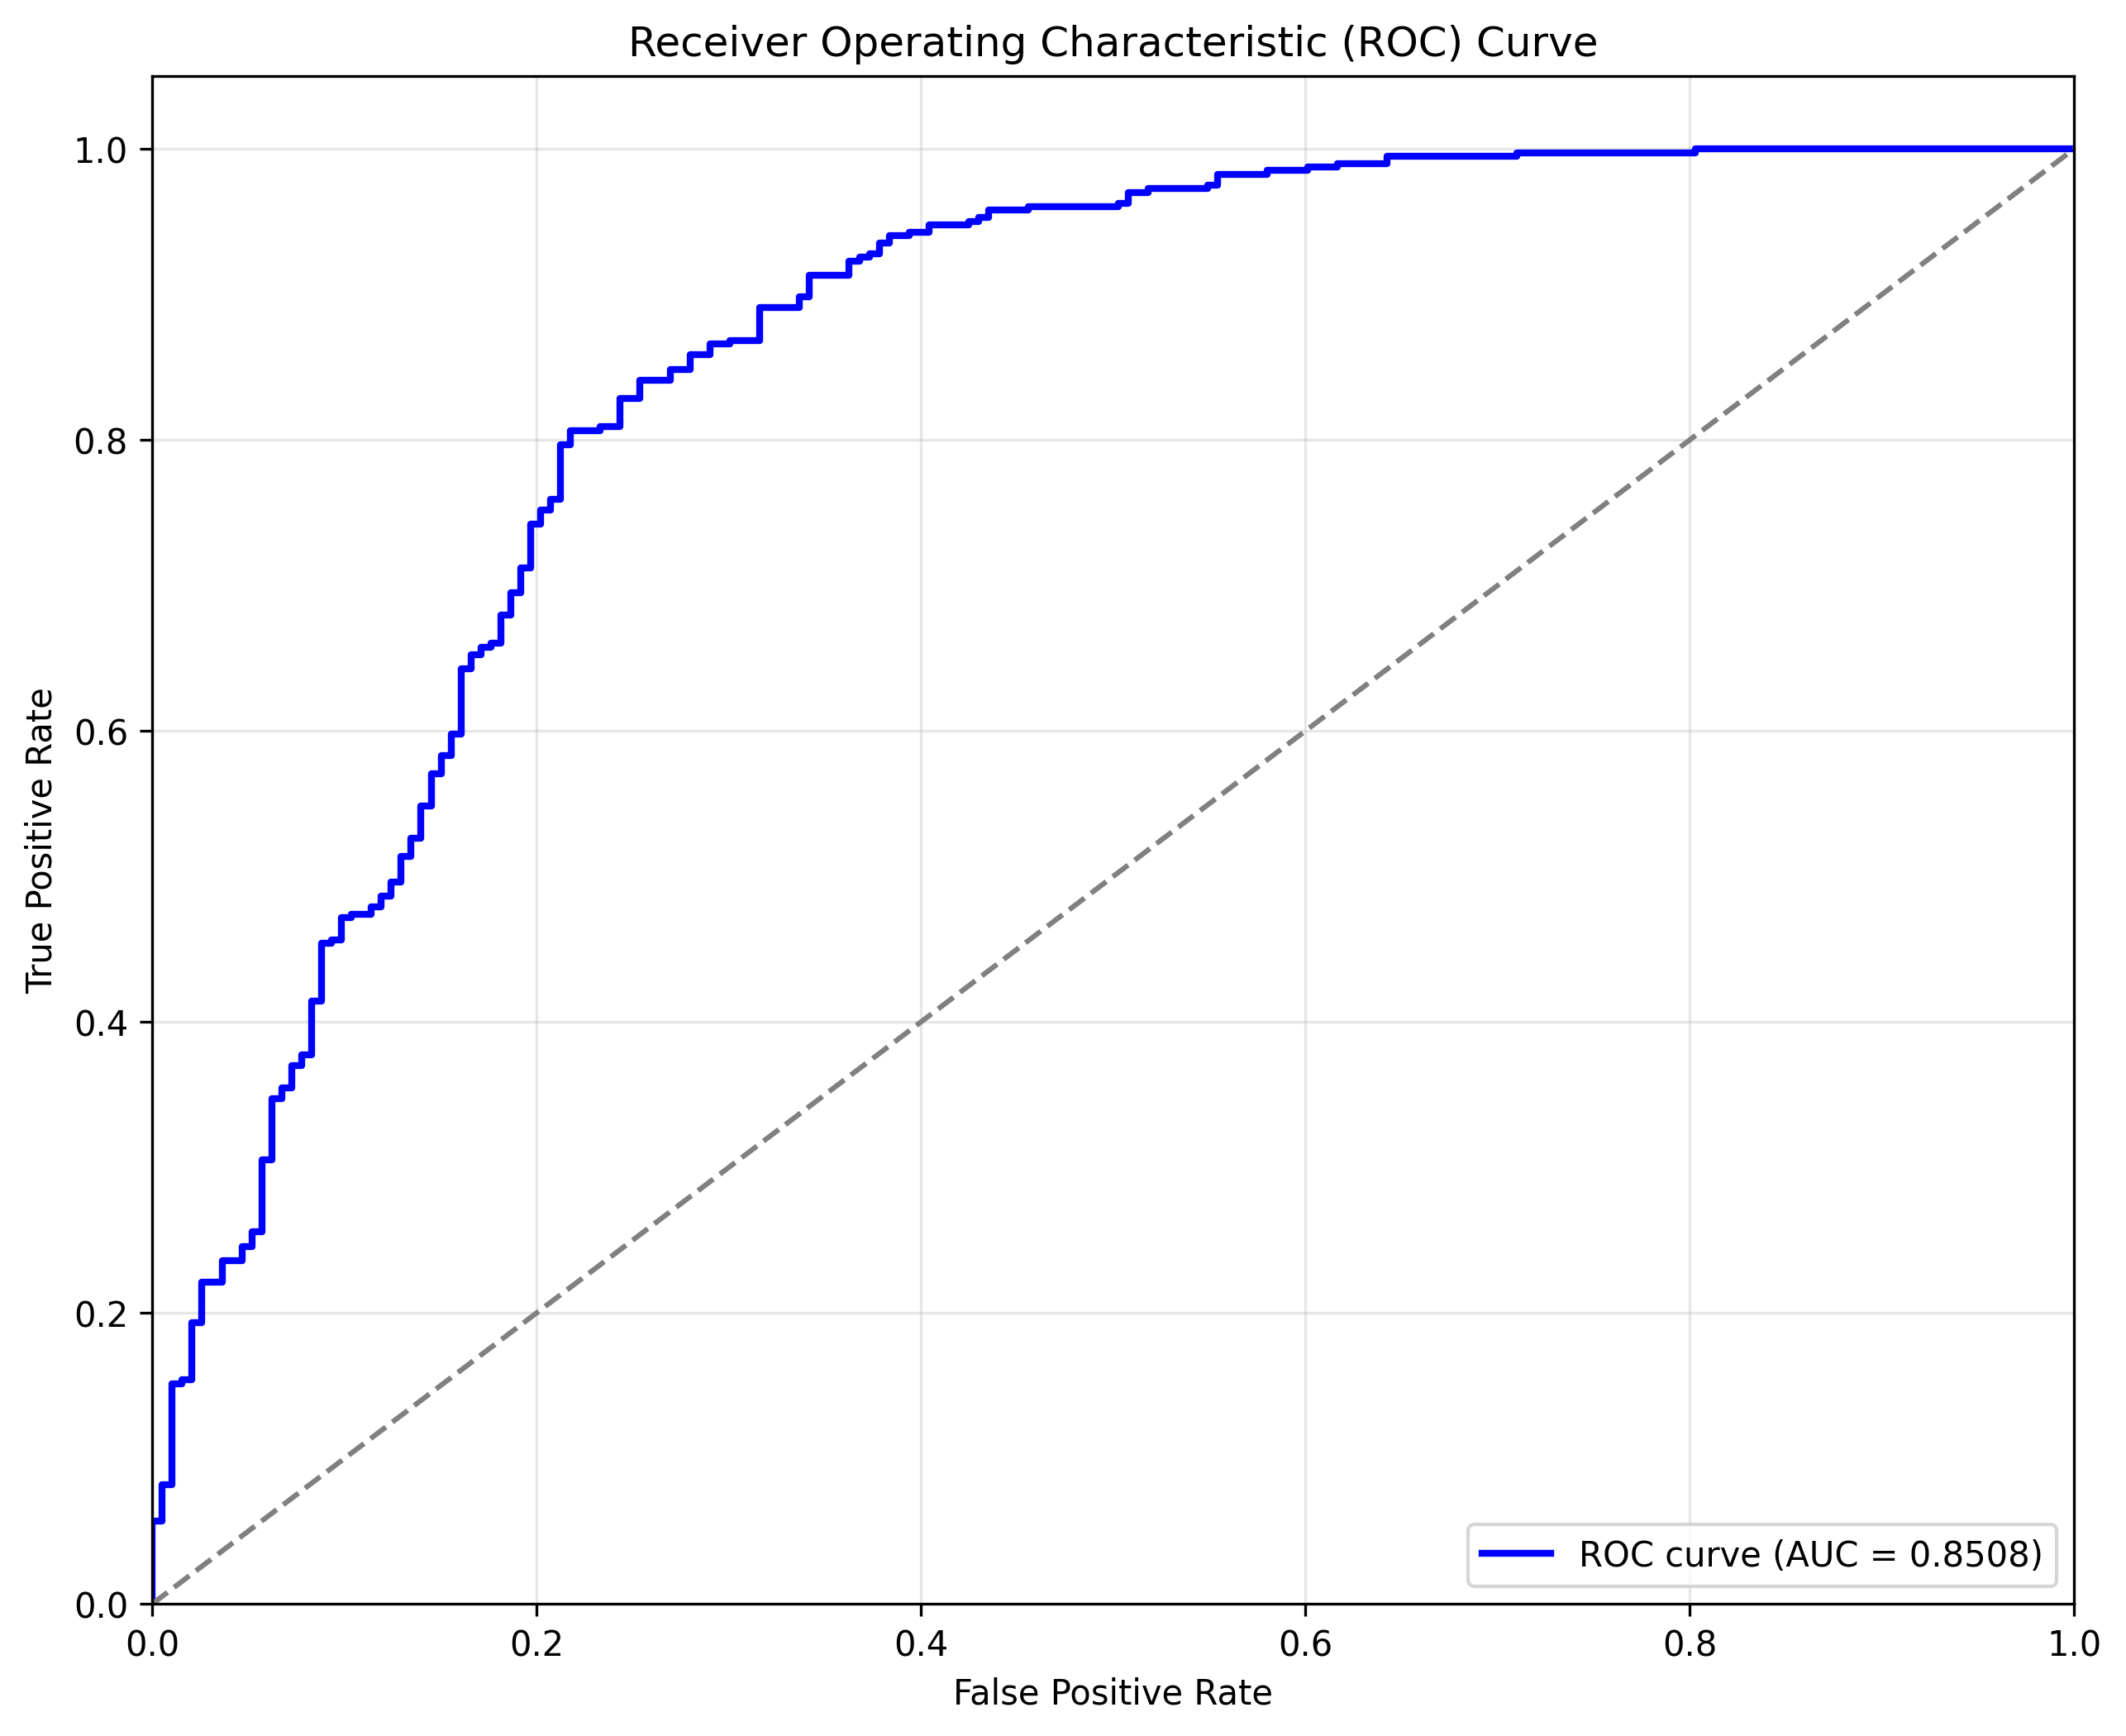

In [108]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(10, 8), dpi=300)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_test_proba):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

The ROC curve shows

- that **the model achieves a good balance between true positive and false positive rates**, with an AUC of 0.8506. 

- **strong discriminatory power** in identifying drivers who are likely to churn versus those who are not.

## *Confusion Matrix*

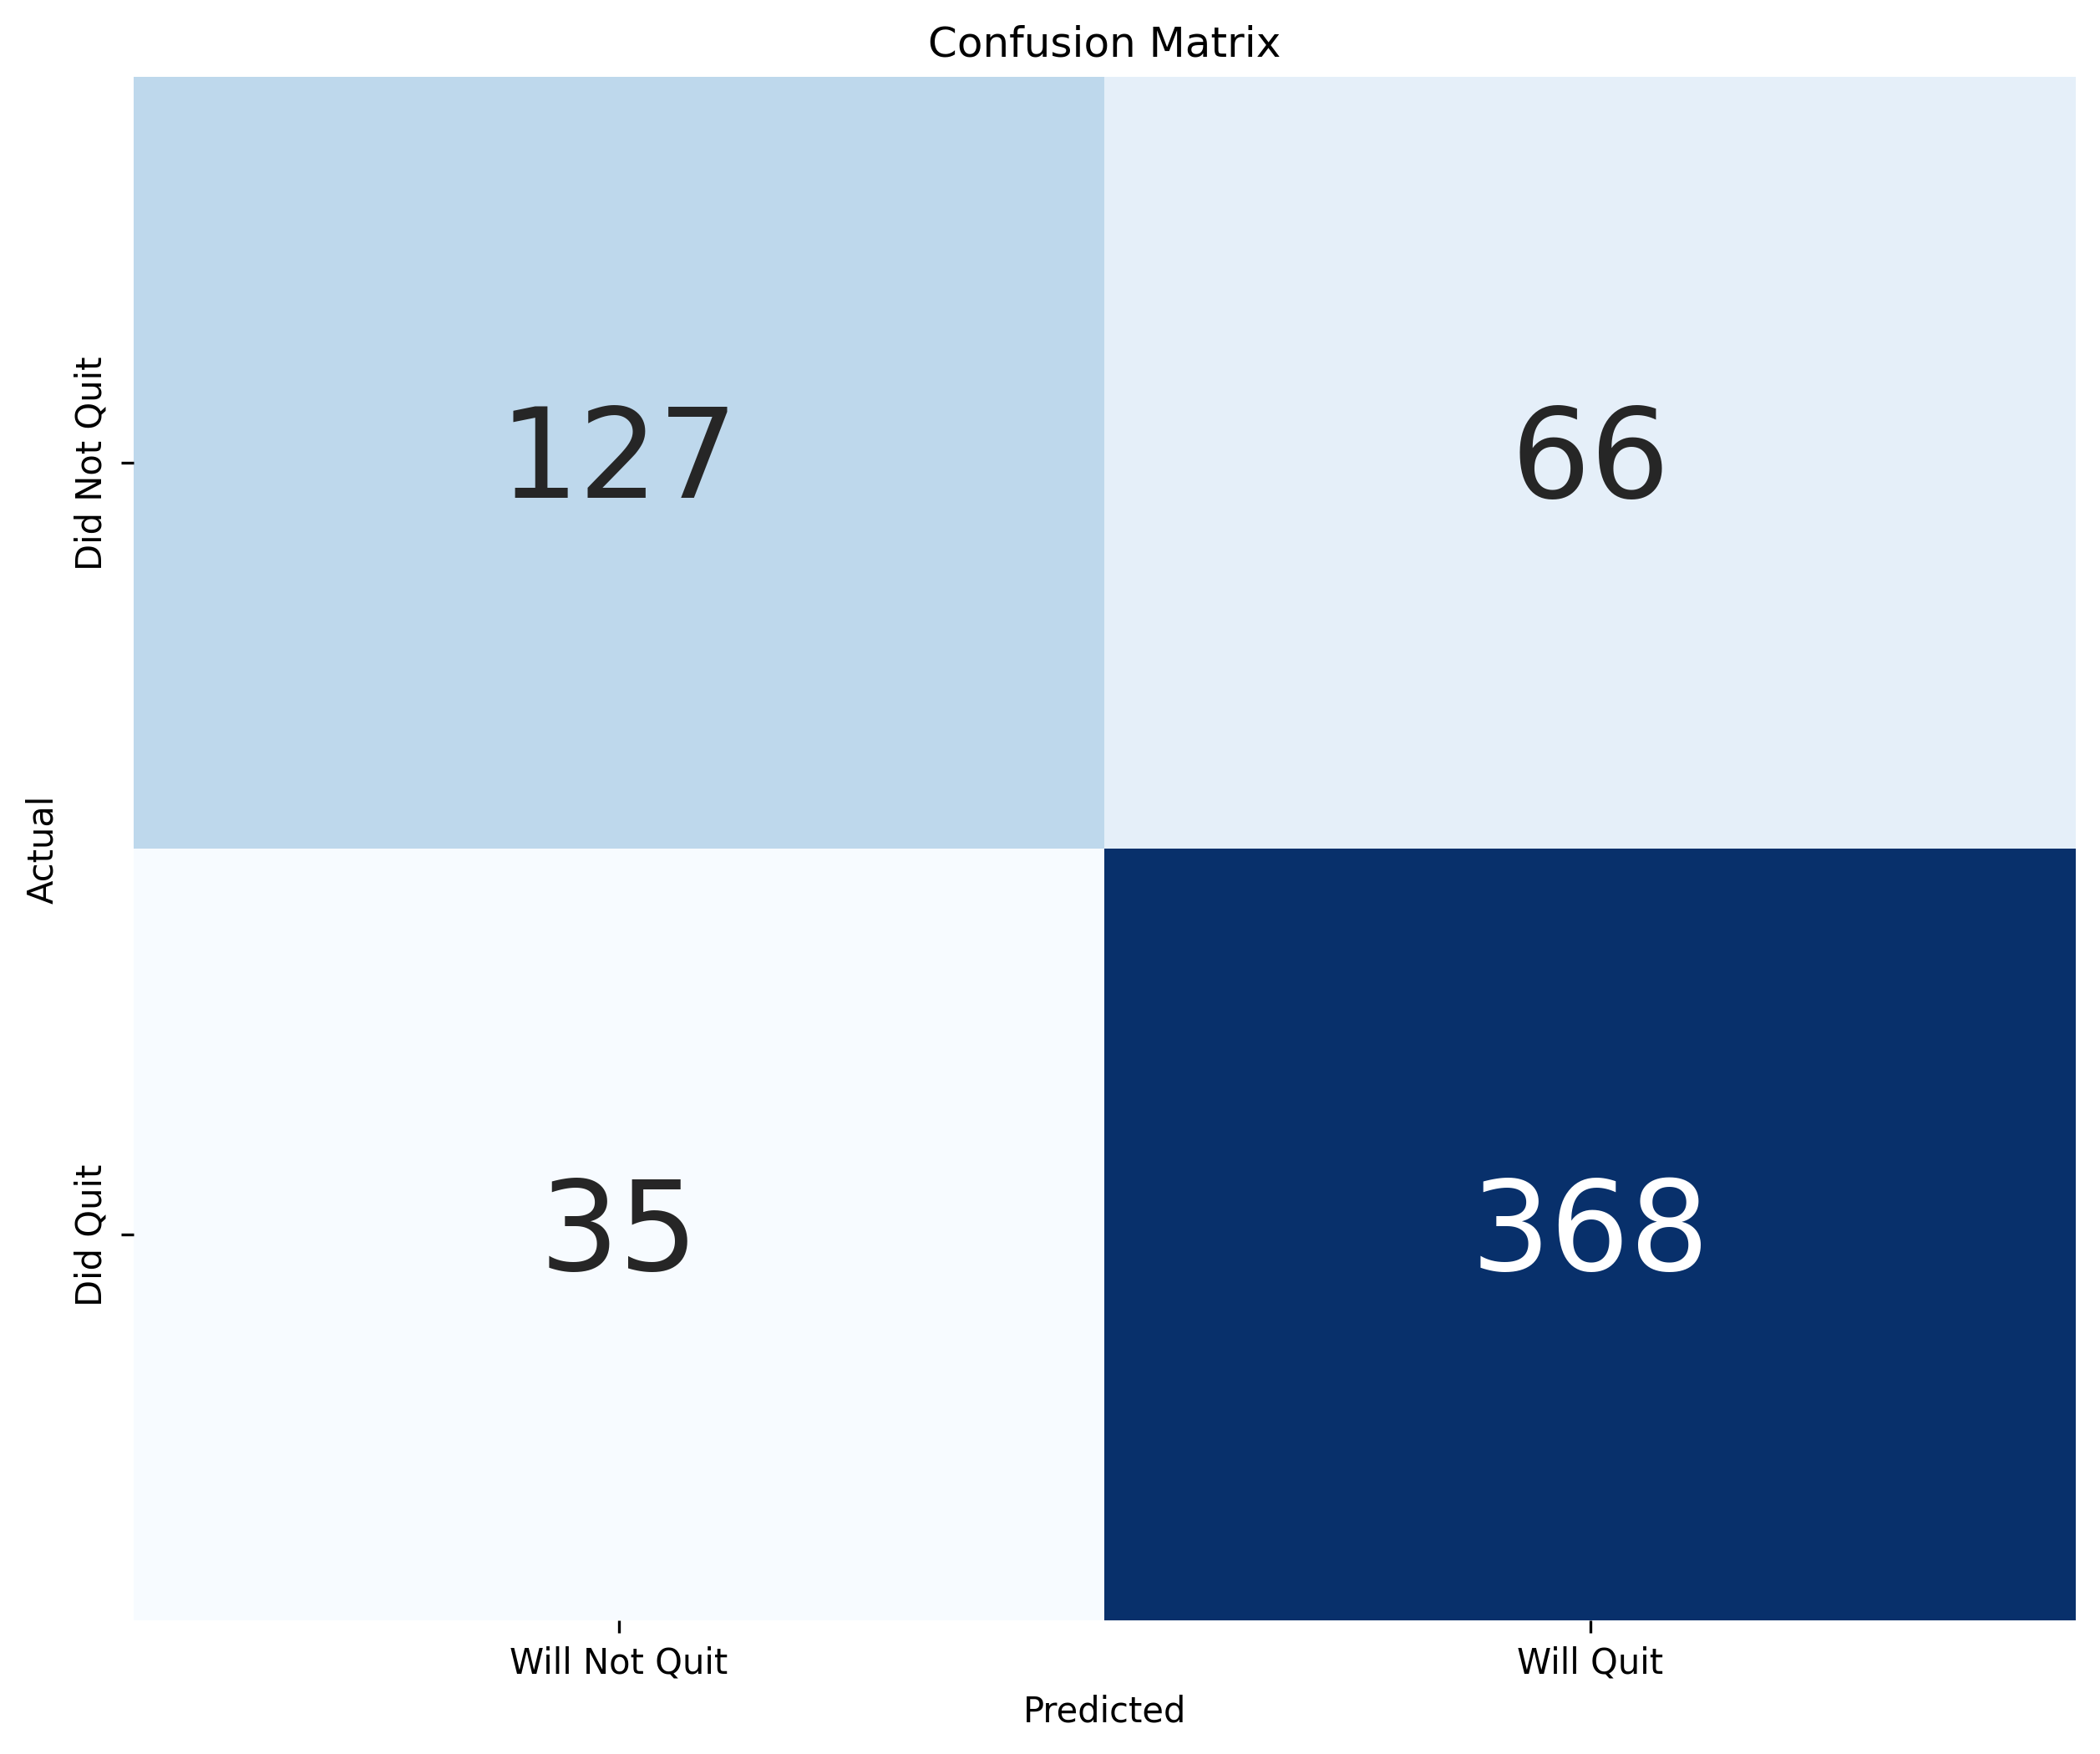

In [109]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8), dpi=300)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 36},
            xticklabels=['Will Not Quit', 'Will Quit'], yticklabels=['Did Not Quit', 'Did Quit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix reveals that 

- **the model correctly identifies the majority of churners** (bottom right: 367)

- **and non-churners** (top left: 127),

- **while making relatively few misclassifications**. 

This demonstrates reliable performance in real-world churn prediction scenarios.

Skipping Voting Ensemble - no feature_importances_ attribute
Features consistently important across models:


feature  model_count  importance
0            EmpTenure            5    0.149737
1   TotalBusinessValue            5    0.131566
2    QuarterlyRating_3            5    0.106157
3    QuarterlyRating_2            5    0.106052
4    QuarterlyRating_4            5    0.102088
5               Income            5    0.071081
6                  Age            5    0.044139
7      EmpPromotions_1            5    0.037832
8             City_C29            5    0.026444
9             City_C19            5    0.020700
10            City_C12            5    0.013580
11             City_C9            4    0.018647
12    EducationLevel_1            4    0.013497
13            City_C18            4    0.011808
14    EducationLevel_2            4    0.010233
15            City_C20            4    0.009306
16          Gender_1.0            4    0.008698
17     EmpPromotions_2            3    0.015527
18            City_C22            3    0.009514

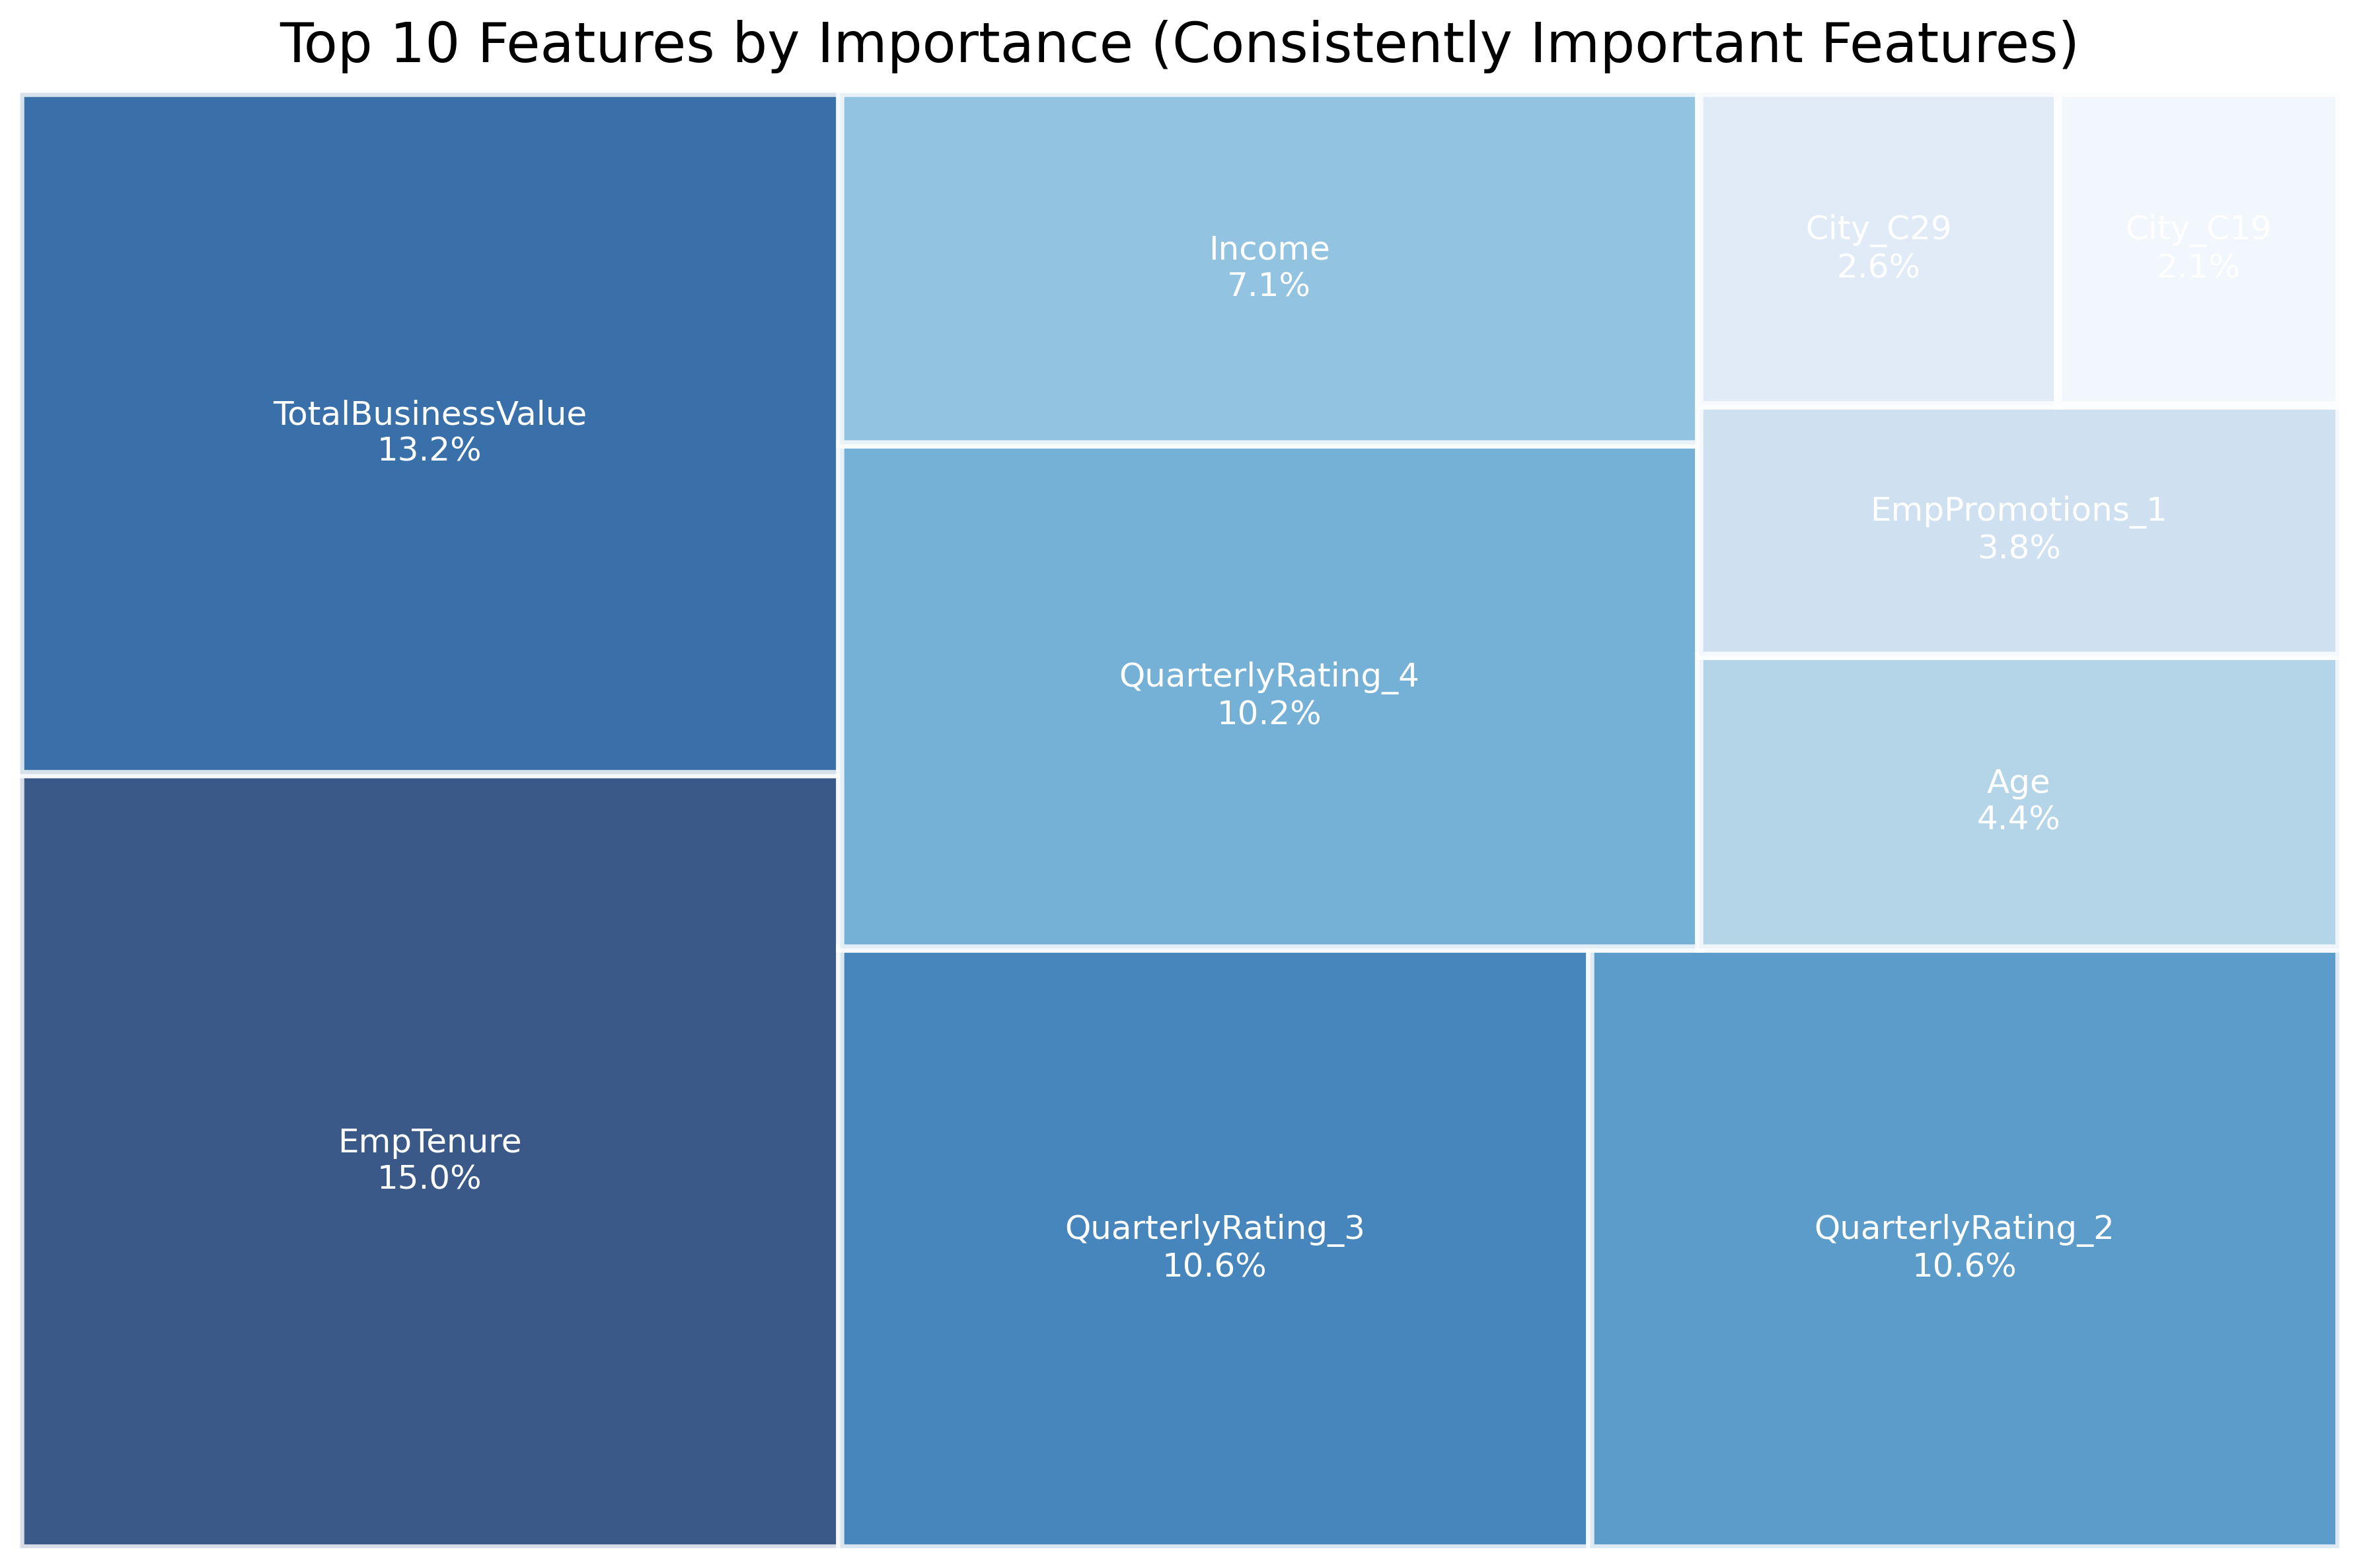

In [115]:
# Identify features that consistently rank highly across models
top_n = 20
all_top_features = []

# Get top features from individual models
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importance = pd.DataFrame({
            'feature': X_train_balanced.columns.tolist(),
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        all_top_features.append(set(importance['feature'].head(top_n)))
    else:
        # Skip models without feature_importances_ (like VotingClassifier)
        print(f"Skipping {name} - no feature_importances_ attribute")

# Calculate average importance across all models with feature_importances_
all_importances = []
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        imp_df = pd.DataFrame({
            'feature': X_train_balanced.columns.tolist(),
            'importance': model.feature_importances_
        })
        all_importances.append(imp_df)

# Average importances across all models
ensemble_importance = pd.concat(all_importances).groupby('feature').mean().reset_index()

# Add voting ensemble top features if available
if 'Voting Ensemble' in models:
    voting_importances = []
    for name, estimator in models['Voting Ensemble'].named_estimators_.items():
        if hasattr(estimator, 'feature_importances_'):
            voting_importances.append(pd.DataFrame({
                'feature': X_train_balanced.columns.tolist(),
                'importance': estimator.feature_importances_
            }))
    
    if voting_importances:
        # Average the importances from all base estimators
        voting_importance = pd.concat(voting_importances).groupby('feature').mean().reset_index()
        voting_importance = voting_importance.sort_values('importance', ascending=False)
        all_top_features.append(set(voting_importance['feature'].head(top_n)))

# Count feature occurrences across all models
feature_counts = {}
for feature in X_train_balanced.columns:
    count = sum(1 for features in all_top_features if feature in features)
    feature_counts[feature] = count

# Create DataFrame with counts and merge with importance
consistent_features = pd.DataFrame({
    'feature': list(feature_counts.keys()),
    'model_count': list(feature_counts.values())
})
consistent_features = pd.merge(consistent_features, ensemble_importance, on='feature', how='left')
consistent_features = consistent_features.sort_values(['model_count', 'importance'], ascending=[False, False]).reset_index(drop=True)
consistent_features = consistent_features[(consistent_features['model_count'] >= 3) & (consistent_features['importance'] >= 0.0)]

print("Features consistently important across models:")
display(consistent_features)

features = consistent_features['feature']
importances = consistent_features['importance']
plot_feature_importance_treemap(features, importances, 'Consistently Important Features', top_n=10)

The fact that all five models agree on these features gives us high confidence in their predictive power. 

### Recommended Actions

1. **Tenure-Based Interventions**: Implement special retention programs for drivers in their critical tenure periods

2. **Business Value Focus**: Provide additional support to high-value drivers showing early churn signals

3. **Rating Improvement**: Create coaching programs for drivers with declining quarterly ratings

4. **Income Stability**: Develop income guarantee programs for drivers with inconsistent earnings

5. **Age-Specific Programs**: Design targeted retention strategies for different age segments

_____
# 8. Summary & Recommendations

#### **Model Performance Summary**

- **Best Model:** AdaBoost — went from ROC-AUC: 0.6986 on Validation to 0.7627 on Test

- **Key Insight:** The model generalized well to unseen data.

#### **Top Churn Predictors**

1. `QuarterlyRating` (32.7%) - Most critical factor. Drivers with low ratings are more likely to churn.

2. `EmpTenure` (17.7%) - Length of service matters. Drivers with lower tenure are more likely to churn.

3. `TotalBusinessValue` (14.4%) - Performance indicator. Drivers with lower business value are more likely to churn.

4. `Income` (10.4%) - Financial satisfaction. Drivers with lower income are more likely to churn.

5. `City` & `Age` (6.4%) - Demographic factors. Drivers in certain cities and age groups are more likely to churn.

#### **Test Set Performance**

- **Precision:** 83% for churners (low false positives)

- **Recall:** 91% for churners (catches most actual churners)

- **F1-Score:** 87% for churners (balanced performance)

- **Overall Accuracy:** 81%

#### **Business Insights & Recommendations**

<span style="font-size:18px; text-decoration: underline;">Key Findings</span>

- <span style="font-size:18px;">Performance-driven churn: Quarterly rating is the strongest predictor</span>

- <span style="font-size:18px;">Tenure-based risk: Newer drivers are more likely to churn</span>

- <span style="font-size:18px;">Financial motivation: Income and business value significantly impact retention</span>

<span style="font-size:18px; text-decoration: underline;">Actionable Recommendations</span>

- <span style="font-size:18px;">Immediate Focus: Actively monitor quarterly ratings and put at-risk drivers on a Performance Improvement Plan</span>

- <span style="font-size:18px;">Retention Strategy: Engage new drivers (<12 months tenure) with incentives and outreach programs</span>

- <span style="font-size:18px;">Performance Incentives: Increase business value opportunities for low performers</span>

- <span style="font-size:18px;">Geographic Analysis: Investigate city-specific issues in high-churn areas</span>

#### **Final Conclusion**

The ensemble learning model successfully:

1. Identified churn drivers with business relevance

2. Achieved strong predictive performance (0.7627 ROC-AUC)

3. Provided actionable insights for retention strategies

4. Demonstrated excellent generalization from validation to test